<h1><center> Исследование расходов на маркетинг.
</center></h1>

# Содержание
1. [Введение](#introduction)
2. [Шаг 1. Загрузите данные и подготовьте их к анализу](#paragraph1)
    1. [Вывод](#paragraph1.1)
3. [Шаг 2. Рассчитайте метрики и постройте графики](#paragraph2)
    1. [Продуктовые метрики](#paragraph2.1) 
       1. [DAU, WAU и MAU](#paragraph2.1.1) 
       2. [Количество сессий в день](#paragraph2.1.2)
       3. [Продолжительность пользовательской сессии](#paragraph2.1.3)
       4. [Retention Rate](#paragraph2.1.4)
    2. [Метрики электронной коммерции](#paragraph2.2)  
       1. [Среднее время до покупки](#paragraph2.2.1)
       2. [Cреднее количество покупок на одного клиента за  период 6 месяцев](#paragraph2.2.2)
       3. [Средняя выручка с пользователя](#paragraph2.2.3)
       4. [LTV](#paragraph2.2.4)
    3. [Маркетинговые метрики](#paragraph2.3)
       1. [Распределение расходов по рекламным источникам](#paragraph2.3.1)
       2. [CAC](#paragraph2.3.2)
       3. [ROMI](#paragraph2.3.3)
4. [Шаг 3. Сформулируйте выводы и рекомендации](#paragraph3)       

## Введение<a name="introduction"></a>

***Цель работы:***
 На основе анализа выявить невыгодные источники трафика и дать рекомендации по оптимизации рекламного бюджета
 
 Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
 
* лог сервера с данными о посещениях сайта Яндекс.Афиши,
* выгрузка всех заказов за этот период,
* статистика рекламных расходов.

Необходимо изучить:


* как клиенты пользуются сервисом,
* когда делают первые покупки на сайте,
* сколько денег приносит компании каждый клиент,
* когда расходы на привлечение клиента окупаются.

# Шаг 1. Загрузите данные и подготовьте их к анализу <a name="paragraph1"></a>

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# прочитаем файлы
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv') 

Ознакомимся с данными

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Изменим названия заголовков, для удобства дальнейшей работы 

In [4]:
visits.columns = ['device','end_ts', 'source_id', 'start_ts', 'uid']

In [5]:
# Общая информация
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Пропусков нет


Приведем столбцы end_ts и start_ts к типу данных - дата

In [6]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [7]:
# Описательная статистика
visits.describe(include='all')

,device,end_ts,source_id,start_ts,uid
count,359400,359400,359400.000000,359400,3.594000e+05
unique,2,224760,NaN,224303,NaN
top,desktop,2017-11-24 16:51:00,NaN,2017-11-24 16:06:00,NaN
freq,262567,23,NaN,19,NaN
first,NaN,2017-06-01 00:02:00,NaN,2017-06-01 00:01:00,NaN
last,NaN,2018-06-01 01:26:00,NaN,2018-05-31 23:59:00,NaN
mean,NaN,NaN,3.750515,NaN,9.202557e+18
std,NaN,NaN,1.917116,NaN,5.298433e+18
min,NaN,NaN,1.000000,NaN,1.186350e+13
25%,NaN,NaN,3.000000,NaN,4.613407e+18


1. В данных информация по двум типам устройств
2. Данные с 2017-06-01 по 2018-06-01

In [8]:
# Проверка дубликатов
visits.duplicated().value_counts()

False    359400
dtype: int64

Дублирующих записей в данных нет

In [9]:
# Уникальные знач-я source_id
visits.source_id.unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

In [10]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [11]:
# Общая инф-я
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Пропусков нет


Изменим тип данных

In [12]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [13]:
# Стат. инф-я
costs.describe(include='all')

,source_id,dt,costs
count,2542.000000,2542,2542.000000
unique,NaN,364,NaN
top,NaN,2018-03-03 00:00:00,NaN
freq,NaN,7,NaN
first,NaN,2017-06-01 00:00:00,NaN
last,NaN,2018-05-31 00:00:00,NaN
mean,4.857199,NaN,129.477427
std,3.181581,NaN,156.296628
min,1.000000,NaN,0.540000
25%,2.000000,NaN,21.945000


1. На первый взгляд в данных ошибок нет
2. Данные за промежуток 2017-06-01 по 2018-05-31

In [14]:
# Уникальные знач-я source_id
costs.source_id.unique()

array([ 1,  2,  3,  4,  5,  9, 10])

Можно предположить, что бюджет расходуется не на все возможные источники

In [15]:
# Проверка дубликатов
costs.duplicated().value_counts()

False    2542
dtype: int64

Дубликатов нет

In [16]:
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [18]:
# Изменим названия заголовков
orders.columns = ['buy_ts','revenue', 'uid']
# Изменим тип данных
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [19]:
orders.describe(include='all')

,buy_ts,revenue,uid
count,50415,50415.000000,5.041500e+04
unique,45991,NaN,NaN
top,2018-05-31 10:13:00,NaN,NaN
freq,9,NaN,NaN
first,2017-06-01 00:10:00,NaN,NaN
last,2018-06-01 00:02:00,NaN,NaN
mean,NaN,4.999647,9.098161e+18
std,NaN,21.818359,5.285742e+18
min,NaN,0.000000,3.135781e+14
25%,NaN,1.220000,4.533567e+18


In [20]:
# Проверка дубликатов
orders.duplicated().value_counts()

False    50415
dtype: int64

Дубликатов нет

## Вывод  <a name="paragraph1.1"></a>
1.	«Полных» дубликатов не обнаружено
2.	Бюджет расходуется не на все рекламные источники
3.	В данных информация по двум типам устройств


## Шаг 2. Рассчитайте метрики и постройте графики<a name="paragraph2"></a>

Для удобства дальнейшей работы напишем функцию, которая «оформляет» графики

In [21]:
def graphic(name, x, y, legend=0):
    # Сохраняем параметры в переменной
    parameters = (
        plt.tick_params(axis='both', which='major', labelsize=16),
        plt.title(name, fontsize=30),
        plt.xlabel(x, fontsize=20),
        plt.ylabel(y, fontsize=20)
    )

    # Выполнение кода по условию
    if legend == 0:
        return (
            parameters,
            plt.show()
        )

    return (
        parameters,
        plt.legend(fontsize=14),
        plt.show()
    )

### Продуктовые метрики<a name="paragraph2.1"></a>

#### DAU, WAU и MAU<a name="paragraph2.1.1"></a>
Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период, а также постройте график изменения метрик во времени

In [22]:
# Добавим столбцы с годом, месяцем, неделей и днем посещ-я ресурса 
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

In [23]:
# Рассчитаем средние значения метрик за весь период 
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

print(' DAU за весь период', dau_total.uid.round(), '\n', 
       'WAU за весь период', wau_total.uid.round(), '\n',
       'MAU за весь период', mau_total.uid.round())

 DAU за весь период 908.0 
 WAU за весь период 5716.0 
 MAU за весь период 23228.0


In [24]:
# Рассчитаем ежедневное изменение DAU
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).reset_index()
# Переименуем столбцы
dau.columns = ['session_date', 'dau']
dau

,session_date,dau
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
...,...,...
359,2018-05-27,620
360,2018-05-28,1039
361,2018-05-29,948
362,2018-05-30,1289


Построим график изменения DAU во времени 

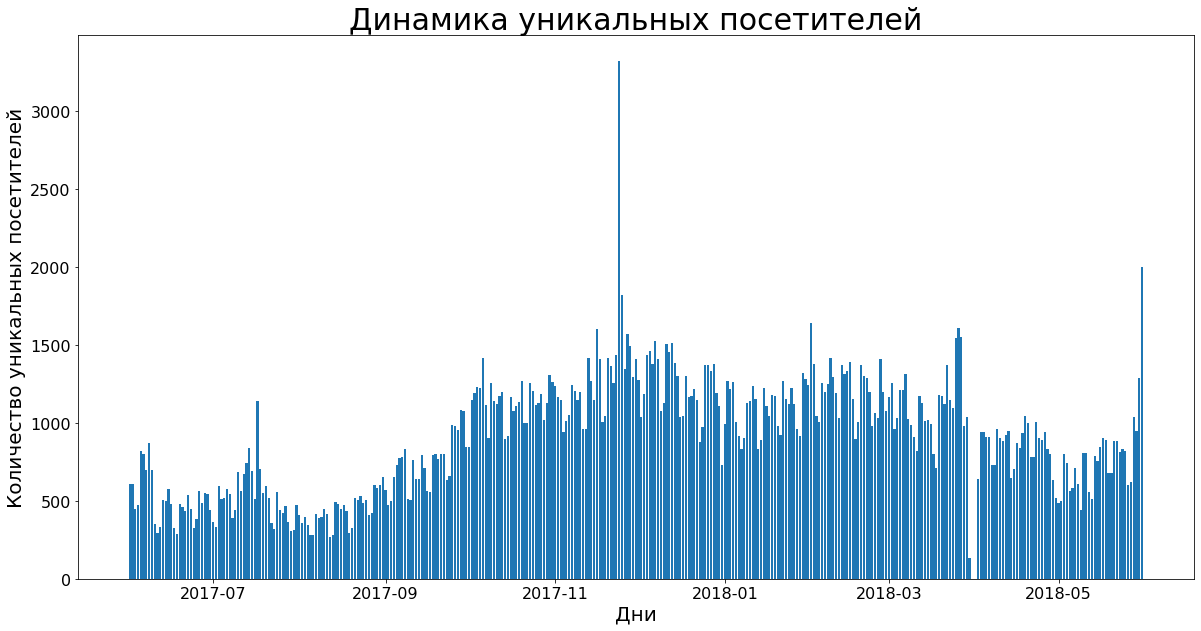

In [25]:
# Отрисовка графика
plt.figure(figsize =(20,10))
plt.bar(dau['session_date'], dau['dau'])
# Оформление
graphic('Динамика уникальных посетителей','Дни','Количество уникальных посетителей')

plt.close()

На графике заметны выбросы, найдем даты «аномального» поведения пользователей 

In [26]:
dau.query('dau > 1600 or dau < 250')

,session_date,dau
168,2017-11-16,1604
176,2017-11-24,3319
177,2017-11-25,1817
245,2018-02-01,1640
298,2018-03-26,1609
302,2018-03-30,131
303,2018-03-31,1
363,2018-05-31,1997


24 ноября 2017 - было "аномально" много посещений уникальных пользователей (3319)

30 и 31 марта 2018, вероятно были технические проблемы, т.к. пользователей было нехарактерно мало, 31 - вообще один

In [27]:
costs.query('dt == "2017-11-24"')

,source_id,dt,costs
176,1,2017-11-24,245.75
539,2,2017-11-24,507.09
902,3,2017-11-24,1788.28
1265,4,2017-11-24,80.88
1628,5,2017-11-24,719.22
1992,9,2017-11-24,49.53
2355,10,2017-11-24,68.11


In [28]:
costs_total_dt = costs.groupby('dt')['costs'].sum()
costs_total_dt.loc[costs_total_dt == costs_total_dt.max()]


dt
2017-11-24    3458.86
Name: costs, dtype: float64

In [29]:
# Рассчитаем изменение WAU
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
# Добавим столбец, объед. год и номер недели
wau = wau.assign(date = wau.session_year.astype(str) + '_' + wau.session_week.astype(str))
wau.head()

,session_year,session_week,uid,date
0,2017,22,2021,2017_22
1,2017,23,4129,2017_23
2,2017,24,2812,2017_24
3,2017,25,2878,2017_25
4,2017,26,3064,2017_26


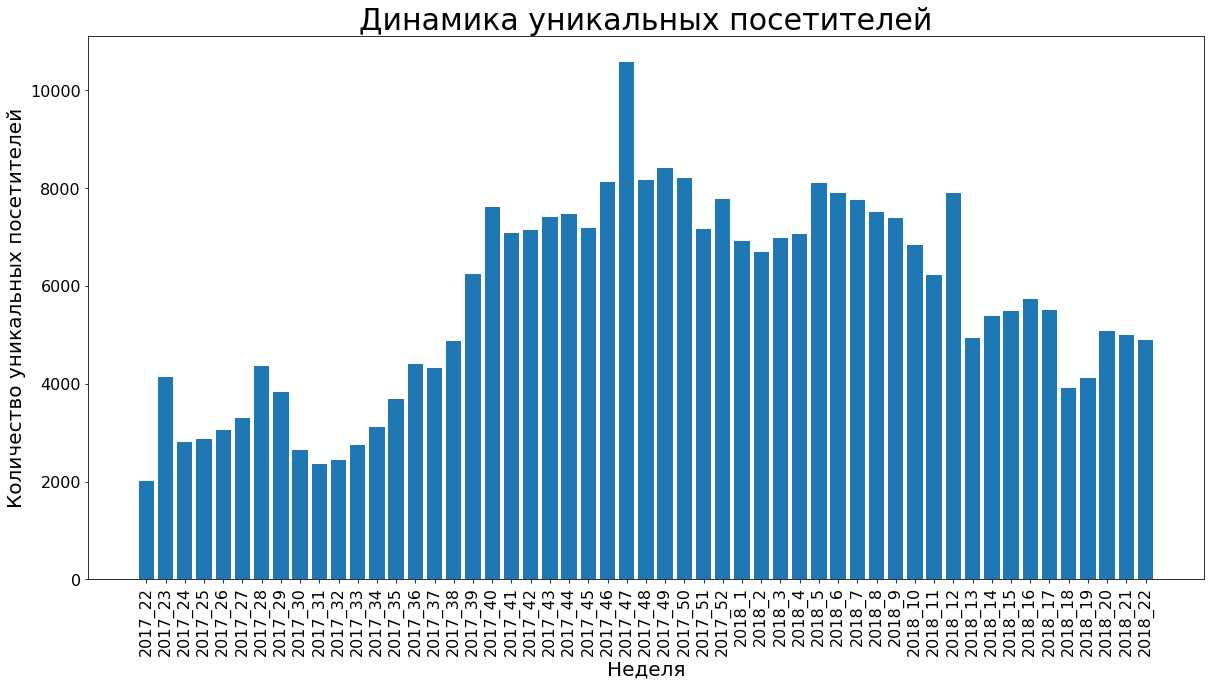

In [30]:
# Построение графика
plt.figure(figsize =(20,10))
plt.bar(wau['date'], wau['uid'])
 
# Оформление
plt.xticks(rotation=90)
graphic('Динамика уникальных посетителей','Неделя','Количество уникальных посетителей')

plt.close()

Из графика можно сделать вывод, что до 46-47 недели 2017 г. сайт набирал популярность, а вот начиная где-то с 13 недели 2018 количество уникальных посетителей пошло на спад

In [31]:
# Рассчитаем изменение MAU
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()
# Добавим столбец, объед. год и месяц
mau = mau.assign(date = mau.session_year.astype(str) + '_' + mau.session_month.astype(str))
mau 

,session_year,session_month,uid,date
0,2017,6,13259,2017_6
1,2017,7,14183,2017_7
2,2017,8,11631,2017_8
3,2017,9,18975,2017_9
4,2017,10,29692,2017_10
5,2017,11,32797,2017_11
6,2017,12,31557,2017_12
7,2018,1,28716,2018_1
8,2018,2,28749,2018_2
9,2018,3,27473,2018_3


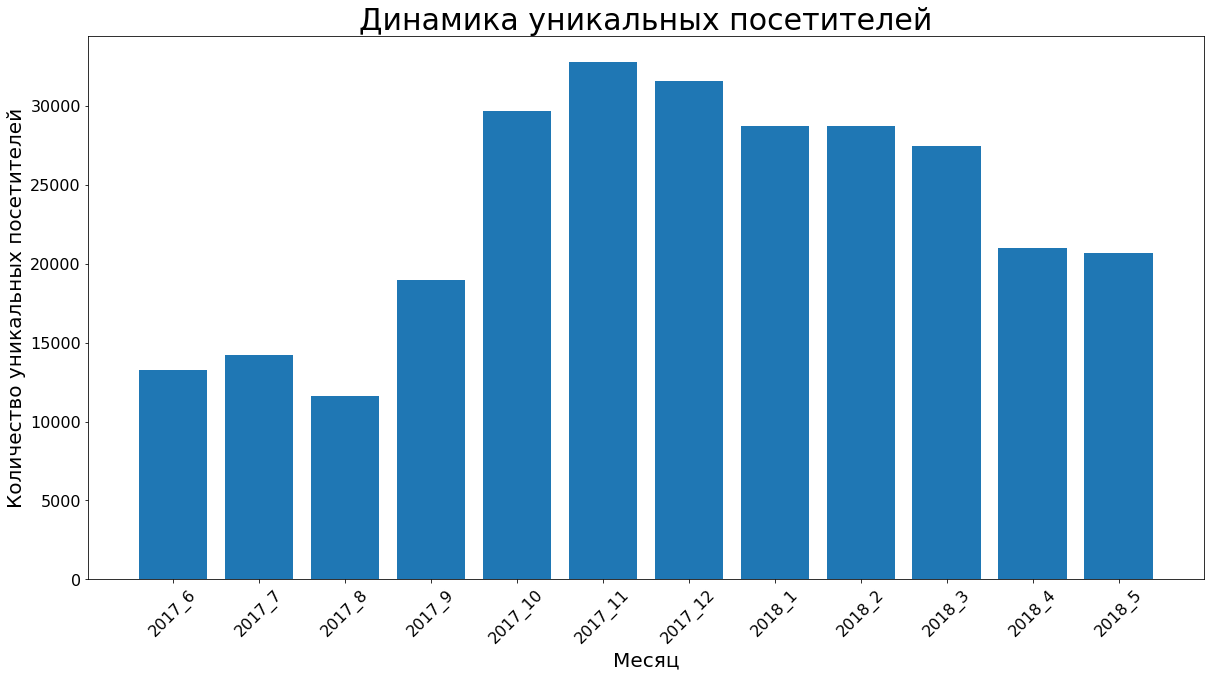

In [32]:
# Построение графика
plt.figure(figsize =(20,10))
plt.bar(mau['date'], mau['uid'])
 
# Оформление
plt.xticks(rotation=45)
graphic('Динамика уникальных посетителей','Месяц','Количество уникальных посетителей')

plt.close()

Здесь наблюдается тот же тренд, что и а предыдущих графиках

Посчитаем аналогичные метрики для разных типов устройств: desktop (персональные компьютеры) и touch (смартфоны)

In [33]:
# Сделаем срезы по каждому устр-ву
visits_desktop = visits.query('device=="desktop"')
visits_touch = visits.query('device=="touch"')

In [34]:
# Посчитаем метрики, округлим, выведем их на экран
print(' Количетво уникальных пользователей в день ПК: {}'.
      format(visits_desktop.groupby('session_date')['uid'].nunique().mean().round()),'\n', 
      'Количетво уникальных пользователей в неделю ПК: {}'.
      format(visits_desktop.groupby(['session_year', 'session_week'])['uid'].nunique().mean().round()),'\n',
      'Количетво уникальных пользователей в месяц ПК: {}'.
      format(visits_desktop.groupby(['session_year', 'session_month'])['uid'].nunique().mean().round()))

print(' ---------------------------------------------------')

print(' Количетво уникальных пользователей в день смартфонах: {}'.
      format(visits_touch.groupby('session_date')['uid'].nunique().mean().round()),'\n',
      'Количетво уникальных пользователей в неделю смартфонах: {}'.
      format(visits_touch.groupby(['session_year', 'session_week'])['uid'].nunique().mean().round()),'\n',
      'Количетво уникальных пользователей в месяц смартфонах: {}'.
      format(visits_touch.groupby(['session_year', 'session_month'])['uid'].nunique().mean().round()))

 Количетво уникальных пользователей в день ПК: 659.0 
 Количетво уникальных пользователей в неделю ПК: 4130.0 
 Количетво уникальных пользователей в месяц ПК: 16725.0
 ---------------------------------------------------
 Количетво уникальных пользователей в день смартфонах: 253.0 
 Количетво уникальных пользователей в неделю смартфонах: 1635.0 
 Количетво уникальных пользователей в месяц смартфонах: 6826.0


С ПК заходит больше пользователей 

Посмотрим на графики МAU

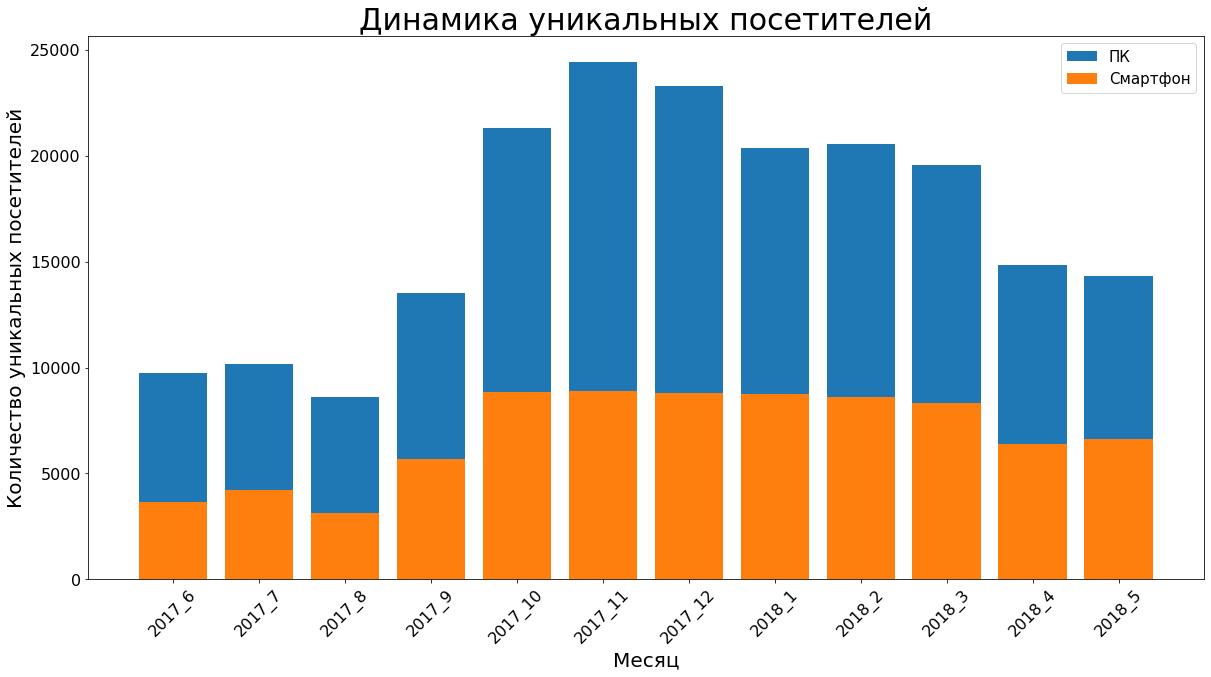

In [35]:
# Рассчитаем изменение MAU
mau_desktop = visits_desktop.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()
mau_touch = visits_touch.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()
# Добавим столбец, объед. год и месяц
mau_desktop = mau_desktop.assign(date = mau_desktop.session_year.astype(str) + '_' + mau_desktop.session_month.astype(str))
mau_touch = mau_touch.assign(date = mau_touch.session_year.astype(str) + '_' + mau_touch.session_month.astype(str))
# Построение графика
plt.figure(figsize =(20,10))
plt.bar(mau_desktop['date'], mau_desktop['uid'])
plt.bar(mau_touch ['date'], mau_touch ['uid']) 
# Оформление
plt.xticks(rotation=45)
plt.legend(['ПК', 'Смартфон'],fontsize=15)
graphic('Динамика уникальных посетителей','Месяц','Количество уникальных посетителей')

plt.close()

На графике еще более очевидно, что с ПК заходит больше пользователей. Временные же тенденции характерны для обоих устройств 

## Вывод
1. Большинство пользователей заходят на сайт с персональных компьютеров. Целесообразно направлять основные ресурсы привлечения именно по этим устройствам
2. Возможно есть техн. проблемы в работе сайта на мобильных устройствах
3.  Есть сигнал, что в последние месяцы активность пользователей снижается, причем это характерно для всех устройств, возможно есть проблемы с контентом сайта 


### Количество сессий в день<a name="paragraph2.1.2"></a>

 Определите, сколько раз за день пользователи в среднем заходят на сайт. Выясните, как изменяется эта метрика с течением времени;

In [36]:
# Посчитаем сколько раз за день сред. пользователь  заходит на сайт.
visit_per_day_one = visits.pivot_table(index=('session_date'), 
                                   values="uid", 
                                   aggfunc = lambda x: x.count() / x.nunique()).reset_index()


visit_per_day_one 

,session_date,uid
0,2017-06-01,1.097521
1,2017-06-02,1.082237
2,2017-06-03,1.071910
3,2017-06-04,1.071429
4,2017-06-05,1.089024
...,...,...
359,2018-05-27,1.083871
360,2018-05-28,1.112608
361,2018-05-29,1.091772
362,2018-05-30,1.093871


In [37]:
print('Среднее кол-во посещений в день средним пользователем:', visit_per_day_one.uid.mean() )

Среднее кол-во посещений в день средним пользователем: 1.082169644003972


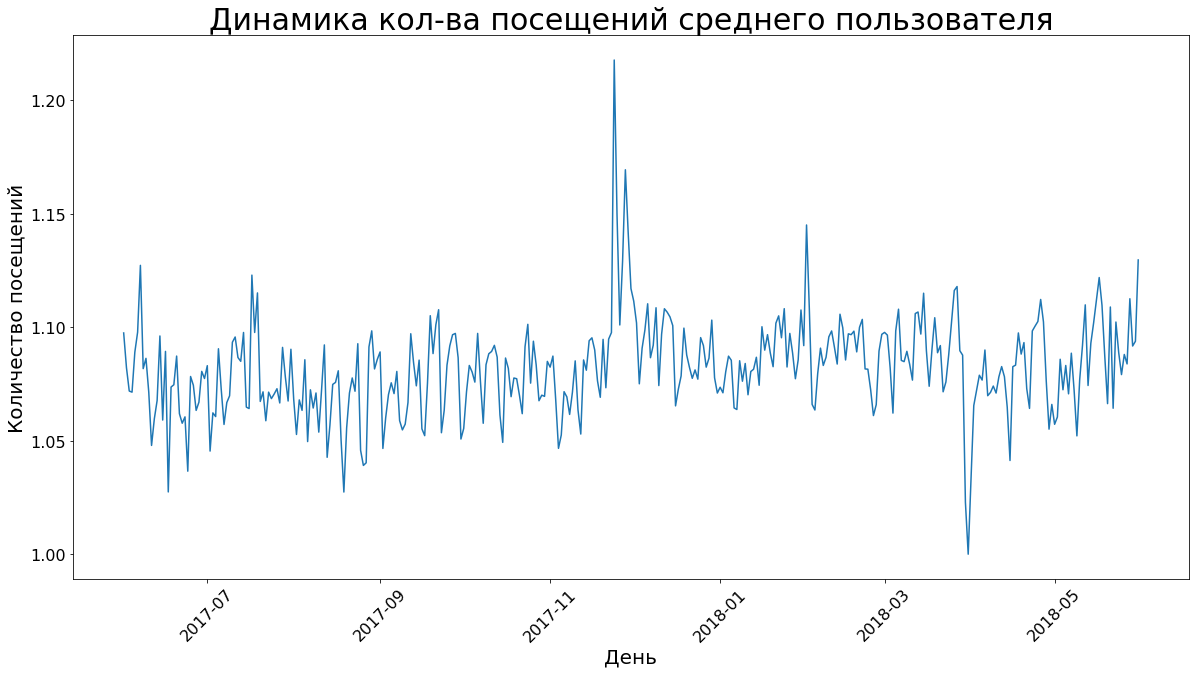

In [38]:
# построим график
plt.figure(figsize =(20,10))
plt.plot(visit_per_day_one['session_date'], visit_per_day_one['uid'])
 
# Оформление
plt.xticks(rotation=45)
graphic('Динамика кол-ва посещений среднего пользователя','День','Количество посещений')

plt.close()

In [39]:
# Посчитаем сколько раз за день пользователи в среднем заходят на сайт.
visit_per_day_mean_two = visits.groupby('session_date').agg({'uid': 'count'}).mean()

print('Среднее кол-во посещений в день:', visit_per_day_mean_two.uid.round())

Среднее кол-во посещений в день: 987.0


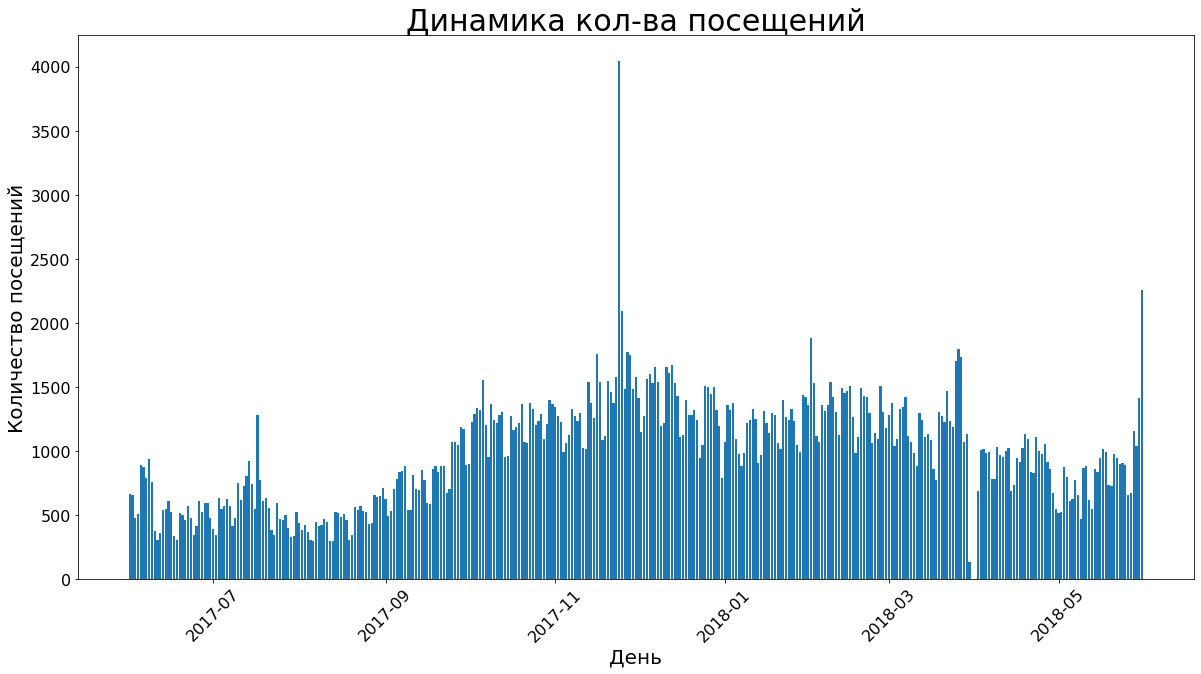

In [40]:
# посчитаем сколько раз пользователи заходили на сайт в каждый день
visit_per_day_two = visits.groupby('session_date').agg({'uid': 'count'}).reset_index()
# построим график
plt.figure(figsize =(20,10))
plt.bar(visit_per_day_two['session_date'], visit_per_day_two['uid'])
 
# Оформление
plt.xticks(rotation=45)
graphic('Динамика кол-ва посещений','День','Количество посещений')

plt.close()

График похож на график DAU, так как в среднем пользователь заходит на сайт незначительно больше одного раза


Посмотрим на показатели для разных устройств



In [41]:
# Посчитаем сколько раз за день пользователи в среднем заходят на сайт с разных устр-в
visit_per_day_mean_desktop = visits_desktop.groupby('session_date').agg({'uid': 'count'}).mean()
visit_per_day_mean_touch = visits_touch.groupby('session_date').agg({'uid': 'count'}).mean()

print(' Среднее кол-во посещений в день с ПК:', visit_per_day_mean_desktop.uid.round(),'\n',
       'Среднее кол-во посещений в день с смартфона:', visit_per_day_mean_touch.uid.round())

 Среднее кол-во посещений в день с ПК: 721.0 
 Среднее кол-во посещений в день с смартфона: 267.0


In [42]:
# Посчитаем какую долю во всех сессиях занимает каждое устройство
ratio_total = (visits.pivot_table(index='device', 
                             values = 'uid', 
                             aggfunc= lambda x: x.count()/visits.shape[0]).
                             reset_index()
)
    
# Отобразим рез-т в % с округлением до двух знаков после запятой    
ratio_total = ratio_total.style.format({'uid': '{:.2%}'})
ratio_total

,device,uid
0,desktop,73.06%
1,touch,26.94%


In [43]:
## Посчитаем  долb пользователей для каждого устройства
ratio_uid = (visits.pivot_table(index='device', 
                              values = 'uid', 
                              aggfunc= lambda x: x.nunique()/visits.uid.nunique()).
                             reset_index()
)           
# Отобразим рез-т в % с округлением до двух знаков после запятой             
ratio_uid = ratio_uid.style.format({'uid': '{:.2%}'})
ratio_uid

,device,uid
0,desktop,72.11%
1,touch,31.27%


Пользователей ПК больше 70 %, соотношение практически такое же и по кол-ву сессий, что говорит о том, что в среднем в день пользователи устройств заходят примерно одинаковое кол-во раз

## Вывод
1.	В среднем каждый пользователь заходит на сайт один раз в день
2.	В среднем в день на сайт заходит 987 пользователей
3.	Среднее количество сессий в день для пользователей ПК превосходит аналогичный показатель для пользователей смартфонов
4.  Пользователей ПК больше 70 % в наших данных


### Продолжительность пользовательской сессии<a name="paragraph2.1.3"></a>

Исследуйте, сколько времени пользователи проводят на сайте. Посчитайте среднюю продолжительность пользовательской сессии за весь период. Выясните, как продолжительность сессий распределена по пользователям;

In [44]:
# Посчитаем продолжит. сессии
visits['duration'] = visits['end_ts'] - visits['start_ts']
# Переведем продолжит. сессии в минуты
visits['duration']= visits['duration']/ np.timedelta64(1,'m')

In [45]:
# Ознакомимся с стат. информ-й
visits['duration'].describe()

count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: duration, dtype: float64

1. Есть нехарактерно  долгие сессии - 711 мин (это почти 12 часов)


Возможные причины – ошибки при выгрузке данных

2. Есть отрицательные значения, чего быть не может

Возможно, пользователь забыл выйти  

In [46]:
# Посмотрим на данные с отриц. продолжительностью 
visits.query('duration < 0')

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,duration
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018,3,12,2018-03-25,-32.0
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018,3,12,2018-03-25,-46.0


Избавимся от выбросов и посмотрим стат. информацию.  С точки зрения логики: нижняя граница> = 0, нулевые сессии нам говорят о том, что пользователь все-таки хотел попасть на сайт; верхняя граница <120 мин. (Здесь, конечно, зависит о контента сайта и это мое субъективное мнение). В любом случае, посмотрим, как измениться статистика 

In [47]:
new_visits = visits.query('duration >= 0 and duration < 120')
new_visits.duration.describe()

count    358460.000000
mean         10.295620
std          14.036055
min           0.000000
25%           1.000000
50%           5.000000
75%          14.000000
max         119.000000
Name: duration, dtype: float64

Статистика несильно изменилась, на мой взгляд, наиболее характерная для выборки величина -  медианное значение, так как у распределения тяжелый правый хвост. В среднем пользователи проводят на сайте 5-6 мин.

In [48]:
print('Наиболее часто встречающаяся продолжительность:', new_visits.duration.mode()[0], 'мин')

Наиболее часто встречающаяся продолжительность: 1.0 мин


In [49]:
# Посчитаем процент нулевых сессий
print('Процент нулевых сессий: {} %'.format(((new_visits.query('duration == 0').size / new_visits.size) * 100).round()))

Процент нулевых сессий: 10.0 %


In [50]:
# Посчитаем распределение продолжительности сессий по пользователям
duration_mean_per_user = new_visits.groupby('uid').agg({'duration': 'mean'}).reset_index()
duration_mean_per_user.head()

,uid,duration
0,11863502262781,6.0
1,49537067089222,2.0
2,297729379853735,1.0
3,313578113262317,11.0
4,325320750514679,5.0


Построим график распределения

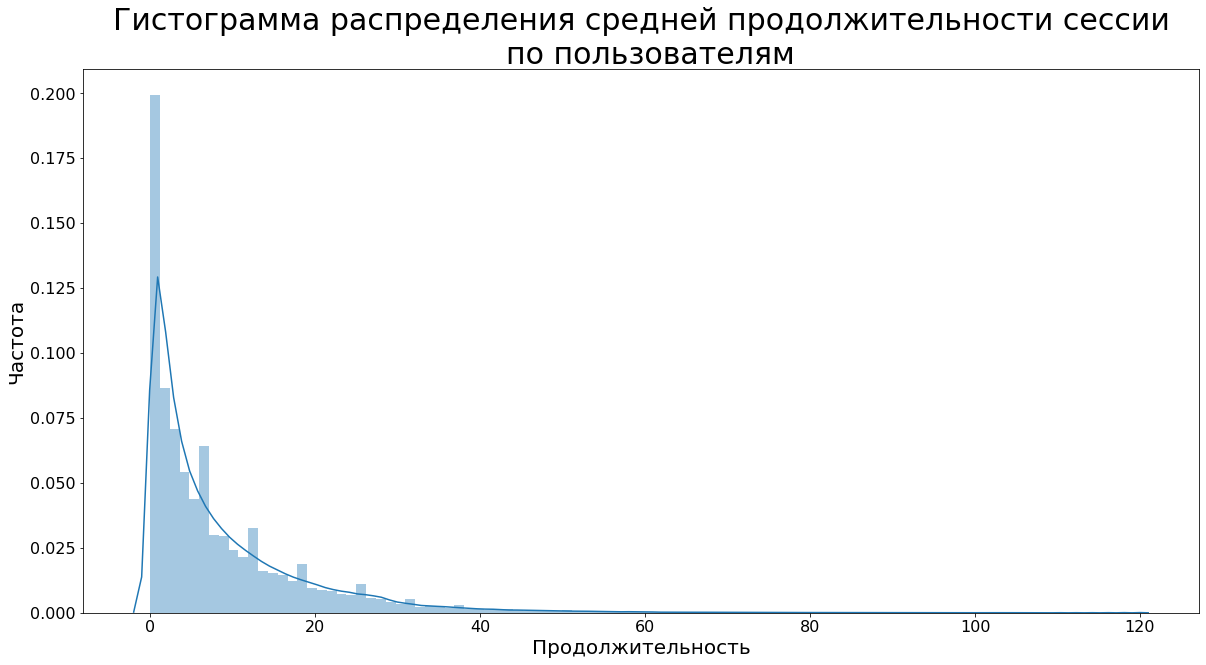

In [51]:
# размер рисунка
plt.figure(figsize=(20,10))
# построим гистограмму (кол-во корзин = 100) и плотность распределения
sns.distplot(duration_mean_per_user.duration,bins=100)
# оформление
graphic('Гистограмма распределения средней продолжительности сессии\n  по пользователям', 'Продолжительность', 'Частота')

plt.close()

Распределение имеет вид распределение Пуассона, что, по логике, и должно быть для такого типа событий. Единственное, есть выбросы - продолжительность 25% всех сессий <= минуте, при этом почти 10 % - это сессии с нулевой продолжительностью.

Построим графики распределения этой метрики для разных типов устройств

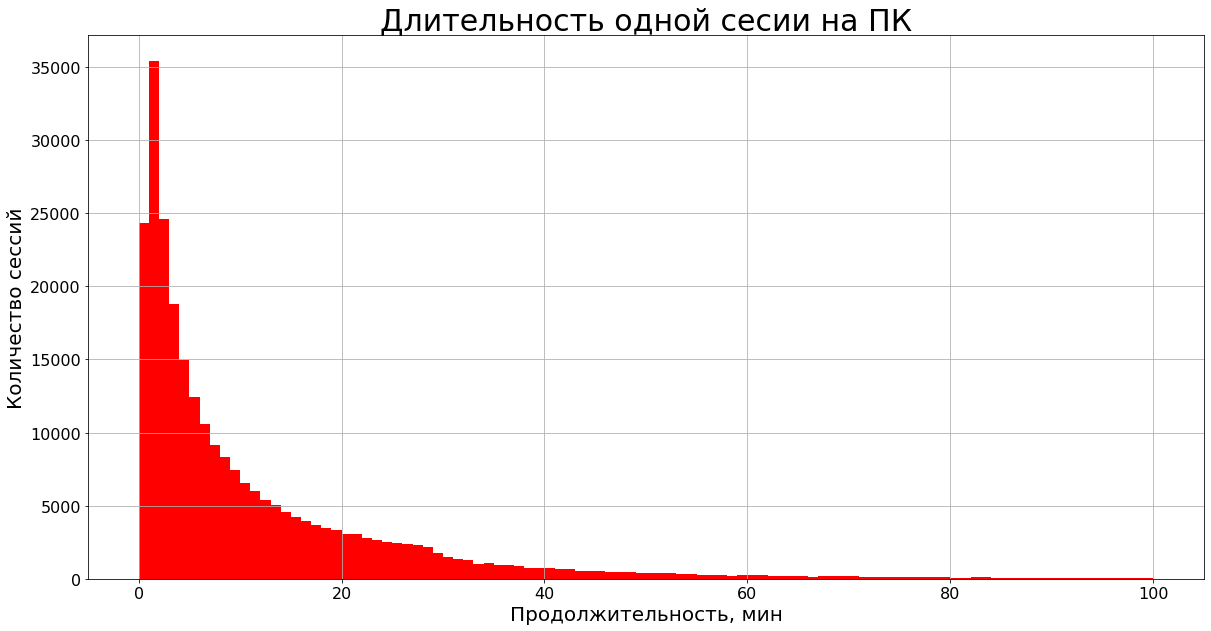

In [52]:
# Посчитаем прод-ть
visits_desktop['duration'] = visits_desktop['end_ts']-visits_desktop['start_ts']
visits_desktop['duration'] = visits_desktop['duration']/np.timedelta64(1, 'm')

# размер рисунка
plt.figure(figsize=(20,10))
# График
visits_desktop['duration'].plot(kind='hist', bins=100, color='red', range=(0, 100), grid=True)
# Оформление
graphic('Длительность одной сесии на ПК', 'Продолжительность, мин', 'Количество сессий')

plt.close()

In [53]:
# При таком распред-е лучше брать медианное значение
print('Cредняя продолжительность сессии на ПК:', visits_desktop['duration'].median(), 'мин.')

Cредняя продолжительность сессии на ПК: 6.0 мин.


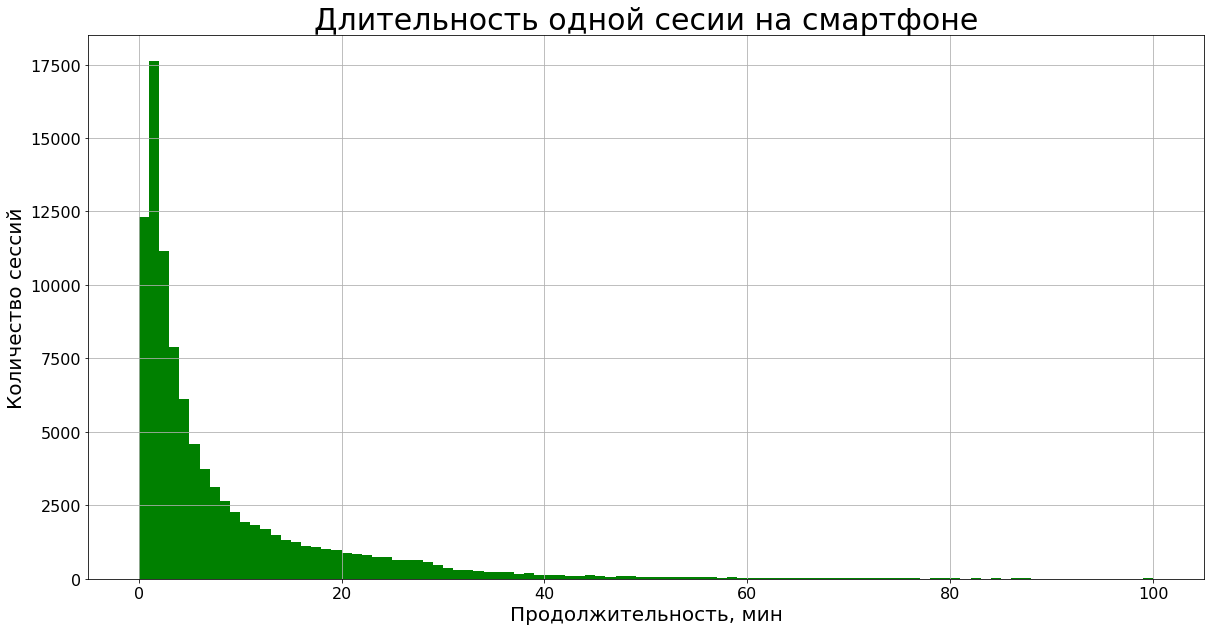

In [54]:
# Посчитаем прод-ть
visits_touch['duration'] = visits_touch['end_ts']-visits_touch['start_ts']
visits_touch['duration'] = visits_touch['duration']/np.timedelta64(1, 'm')

# размер рисунка
plt.figure(figsize=(20,10))
# График
visits_touch['duration'].plot(kind='hist', bins=100, color='green', range=(0, 100), grid=True)
# Оформление
graphic('Длительность одной сесии на смартфоне', 'Продолжительность, мин', 'Количество сессий')

plt.close()

In [55]:
print('Cредняя продолжительность сессии на смартфоне:',visits_touch['duration'].median(), 'мин.')

Cредняя продолжительность сессии на смартфоне: 3.0 мин.


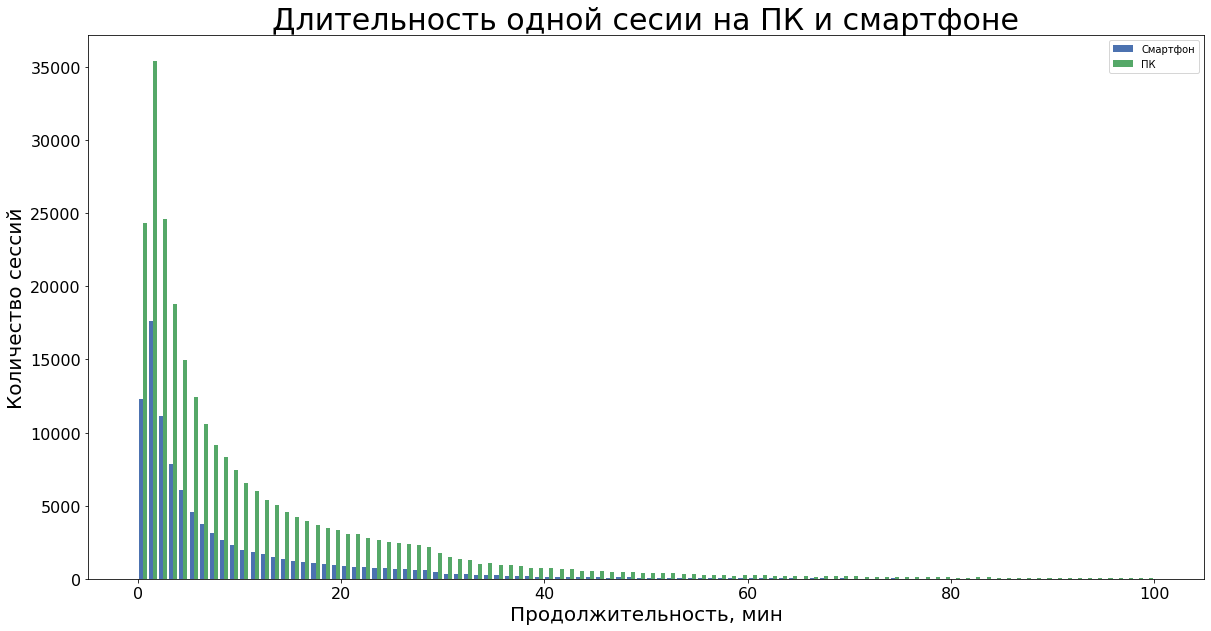

In [56]:
# Построим гистограмму распределения 
# размер рисунка

plt.figure(figsize=(20,10))
plt.style.use('seaborn-deep')
# построим гистограмму (кол-во корзин = 100) и плотность распределения
plt.hist([visits_touch['duration'], visits_desktop['duration']], bins=100, label=['Смартфон', 'ПК'],range=(0, 100))
# оформление
plt.legend(loc='upper right')
graphic('Длительность одной сесии на ПК и смартфоне', 'Продолжительность, мин', 'Количество сессий')

plt.close()

## Вывод

1.	Средняя продолжительность пользовательской сессии – 5-6 мин.
2.	С ПК пользователи «сидят» на сайте дольше – 6 мин., по сравнению с 3 мин. с смартфона
3.	Больше пользователей заходят с ПК
4. 10 % всех сессий - нулевой продолжительности, возможно есть технические проблемы
5. Наиболее часто встречающаяся продолжительность: 1 мин.

###  Retention Rate<a name="paragraph2.1.4"></a>

 Рассчитайте Retention Rate, применяя когортный анализ.

In [57]:
# Выделим месяц в дате сессии
visits['activity_month']=visits['start_ts'].astype('datetime64[M]')
# Найдем первый месяц активности для каждого пользователя 
first_activity_month=visits.groupby('uid')['activity_month'].min()
first_activity_month.name='first_activity_month'
# Добавим полученный рез-т к visits
visits = visits.join(first_activity_month,on='uid')

In [58]:
# Посчитаем "время жизни" для каждой кагорты 
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
# Округлим знач. и переведем к целочисленному типу
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int') 

In [59]:
# Выделим когорты
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
# Переименуем столбец
cohorts.rename(columns={'uid': 'amount'}, inplace=True)
cohorts.head()

,first_activity_month,cohort_lifetime,amount
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [60]:
# Посчитаем первоначальное кол-во пользователей в каждой когорте 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','amount']]
initial_users_count.head()

,first_activity_month,amount
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [61]:
# Переименуем столбец
initial_users_count = initial_users_count.rename(columns={'amount':'cohort_users'}) 
# Добавим инфор-ю о певонач. размераж когорт
cohorts = cohorts.merge(initial_users_count,on='first_activity_month') 
cohorts

,first_activity_month,cohort_lifetime,amount,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [62]:
# Посчитаем retention
cohorts['retention'] = cohorts['amount']/cohorts['cohort_users'] 
cohorts

,first_activity_month,cohort_lifetime,amount,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


In [63]:
# Визуализируем изменение метрики по когортам и месяцам с помощью свод. таблицы
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum') 
# Приведем индекс
retention_pivot.index = retention_pivot.index.strftime('%Y-%m-%d')

retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01,1.0,0.041818,0.027053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


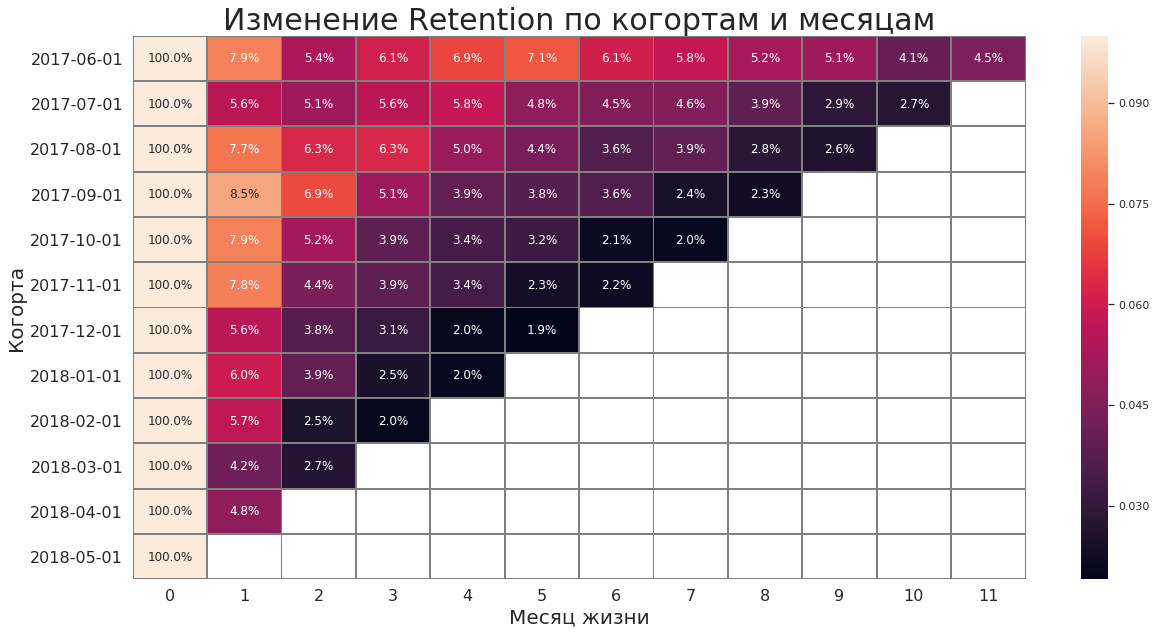

In [64]:
# Визуализируем рез-т с помощью тепловой карты
sns.set(style='white')
plt.figure(figsize=(20, 10))
# Рез-т отобразим в процентах
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1)
# Оформление
graphic('Изменение Retention по когортам и месяцам', 'Месяц жизни', 'Когорта')

plt.close()

На тепловой карте видно, что уже Retention падает для всех когорт. Необходимо продумать эффективные механизмы удержания клиента


Согласно заданию: "в рамках когортного анализа сравнивайте метрики когорт, «проживших» одинаковый период, например 6 месяцев"
    
Отбросим когорты, которые прожили меньше 6 месяцев    

In [65]:
retention_pivot_six = retention_pivot.query('index<"2018-01-01"')
retention_pivot_six

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN


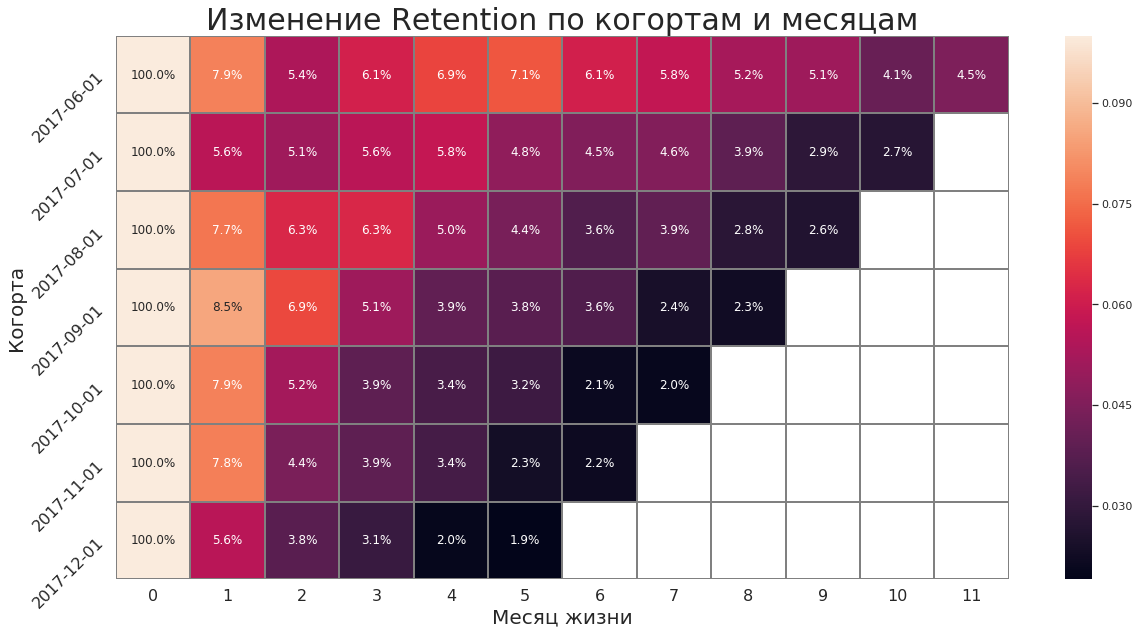

In [66]:
# Визуализируем рез-т с помощью тепловой карты
sns.set(style='white')
plt.figure(figsize=(20, 10))
# Рез-т отобразим в процентах
sns.heatmap(retention_pivot_six, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1)
# Оформление
plt.yticks(rotation=45)
graphic('Изменение Retention по когортам и месяцам', 'Месяц жизни', 'Когорта')

plt.close()

После полгода существования когорт (Месяц жизни = 5), самый высокий показатель Retention - у первой когорты (впервые посетившие сайт 06-2017 г.). При этом Retention в большей степени падает в более младших когортах. Можно предположить, что возможно есть проблемы с контентом сайта (либо произошли неудачные изменения, либо, наоборот, не было необходимых изменений отвечающим, например, требованиям новой конкуренции). Люди "давно" пользующиеся услугами сайта, возвращаются чаще, хотя и в меньшей степени каждый месяц

## Вывод
 Retention падает для всех когорт. Необходимо продумать эффективные механизмы удержания клиента

## Метрики электронной коммерции<a name="paragraph2.2"></a> 

### Среднее время до покупки<a name="paragraph2.2.1"></a> 

"Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки"
Т.е. нам нужно посчитать сколько дней обычно проходит от первого визита до первой покупки.

In [67]:
# найдем первую дату покупки
first_buy_date = orders.groupby(['uid'])['buy_ts'].min()
first_buy_date.name = 'first_buy_date'
# присоеденим рез-т к orders
orders = orders.join(first_buy_date,on='uid') 

orders

,buy_ts,revenue,uid,first_buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00


In [68]:
# Сгруппируем orders по uid, чтобы для каждому пользователю соотв. дата его первой покупки
first_orders= orders.pivot_table(index=('uid', 'first_buy_date')).reset_index()
first_orders

,uid,first_buy_date,revenue
0,313578113262317,2018-01-03 21:51:00,0.550000
1,1575281904278712,2017-06-03 10:13:00,1.525000
2,2429014661409475,2017-10-11 18:33:00,73.330000
3,2464366381792757,2018-01-28 15:54:00,2.440000
4,2551852515556206,2017-11-24 10:14:00,5.495000
...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,3.050000
36519,18445407535914413204,2017-09-22 23:55:00,0.293333
36520,18445601152732270159,2018-03-26 22:54:00,4.220000
36521,18446156210226471712,2018-02-18 19:34:00,9.780000


In [69]:
# найдем первую дату посещения сайта
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
# присоеденим рез-т к visits
visits = visits.join(first_activity_date,on='uid') 

In [70]:
# Аналогично сделаем таблицу, только с первым заходом на сайт каждого пользователя
first_visits = visits.pivot_table(index=('uid', 'first_activity_date')).reset_index()
first_visits

,uid,first_activity_date,cohort_lifetime,duration,session_month,session_week,session_year,source_id
0,11863502262781,2018-03-01 17:27:00,0.000000,6.0,3.000000,9.000000,2018.000000,3.0
1,49537067089222,2018-02-06 15:55:00,0.000000,2.0,2.000000,6.000000,2018.000000,2.0
2,297729379853735,2017-06-07 18:47:00,0.000000,1.0,6.000000,23.000000,2017.000000,3.0
3,313578113262317,2017-09-18 22:49:00,3.666667,11.0,4.666667,18.333333,2017.666667,2.0
4,325320750514679,2017-09-30 14:29:00,2.500000,5.0,5.500000,24.000000,2017.500000,5.0
...,...,...,...,...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,0.000000,3.0,11.000000,48.000000,2017.000000,5.0
228165,18446424184725333426,2017-12-06 20:32:00,0.000000,0.0,12.000000,49.000000,2017.000000,4.0
228166,18446556406699109058,2018-01-01 16:29:00,0.000000,2.0,1.000000,1.000000,2018.000000,3.0
228167,18446621818809592527,2017-12-27 13:27:00,2.500000,28.0,8.500000,36.500000,2017.500000,4.0


In [71]:
# Объединим эти две таблицы по uid
first_visits_orders = first_visits.merge(first_orders,on='uid')

In [72]:
# Найдем разницу между датой первой покупки и первой сессии
first_visits_orders['time_to_buy'] = first_visits_orders.first_buy_date - first_visits_orders.first_activity_date
# Посчитаем разницу в минутах
first_visits_orders['time_to_buy'] = first_visits_orders['time_to_buy'] / np.timedelta64(1,'m')
# Результат округлим и приведем к целочисл. типу
first_visits_orders['time_to_buy'] = first_visits_orders['time_to_buy'].round().astype('int') 

In [73]:
first_visits_orders['time_to_buy'].describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: time_to_buy, dtype: float64

1. Среднее слишком сильно отличается от медианного значения - у распределения тяжелый правый хвост
2. При таком распределении адекватнее среднее время покупки отражает медиана - 16 мин.
3. Есть нулевые значения - некоторые пользователи целенаправленно зашли на сайт для покупки


In [74]:
print('Наиболее частое время покупки:', first_visits_orders['time_to_buy'].mode()[0] , 'мин.')

Наиболее частое время покупки: 1 мин.


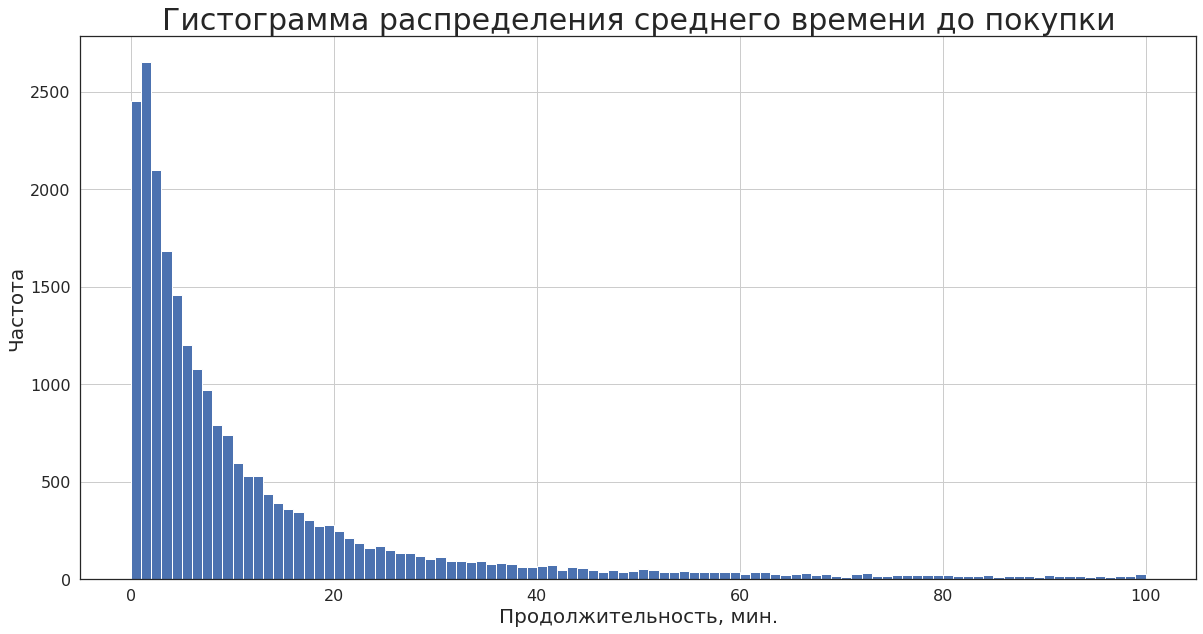

In [75]:
# Построим гистограмму распределения 
# размер рисунка
plt.figure(figsize=(20,10))

# построим гистограмму (кол-во корзин = 100) и плотность распределения
#sns.distplot(first_visits_orders['time_to_buy'], bins=10)
first_visits_orders['time_to_buy'].plot(kind='hist', bins=100, range=(0, 100), grid=True)
# оформление
graphic('Гистограмма распределения среднего времени до покупки', 'Продолжительность, мин.', 'Частота')

plt.close()

1. Распределение имеет вид распределения Пуассона или, возможно, распределения Вейбулла. Точно высчитывать статистику не вижу смысла, потому что и так можно сделать вывод, что большинство тех пользователей, которые решили что-то купить, либо целенаправленно для этого заходят на сайт, либо достаточно быстро (в среднем ~ 16 мин.) определяются с заказом
2. Распределение достаточно равномерное, можно предположить, что поведение пользователей разных типов устройств схоже.


Проверим это предположение

In [76]:
# Сделаем тоже самое, что и выше, только с добавлением информации по device
users = visits.sort_values(by='start_ts').groupby('uid').agg({'start_ts':'first', 'source_id':'first', 'device':'first'})
orders_first_new = orders.sort_values(by='buy_ts').groupby('uid').agg({'buy_ts':'first', 'revenue':'sum'})
# Объеденим таблицы
sales = users.merge(orders_first_new, on='uid')
# Добавим время продажи
sales['time_to_buy']=(sales['buy_ts'] - sales['start_ts']) / np.timedelta64(1, 'm')

In [77]:
# Сделаем срезы по каждому типу устр-в
sales_desktop = sales.query('device=="desktop"')
sales_touch = sales.query('device=="touch"')

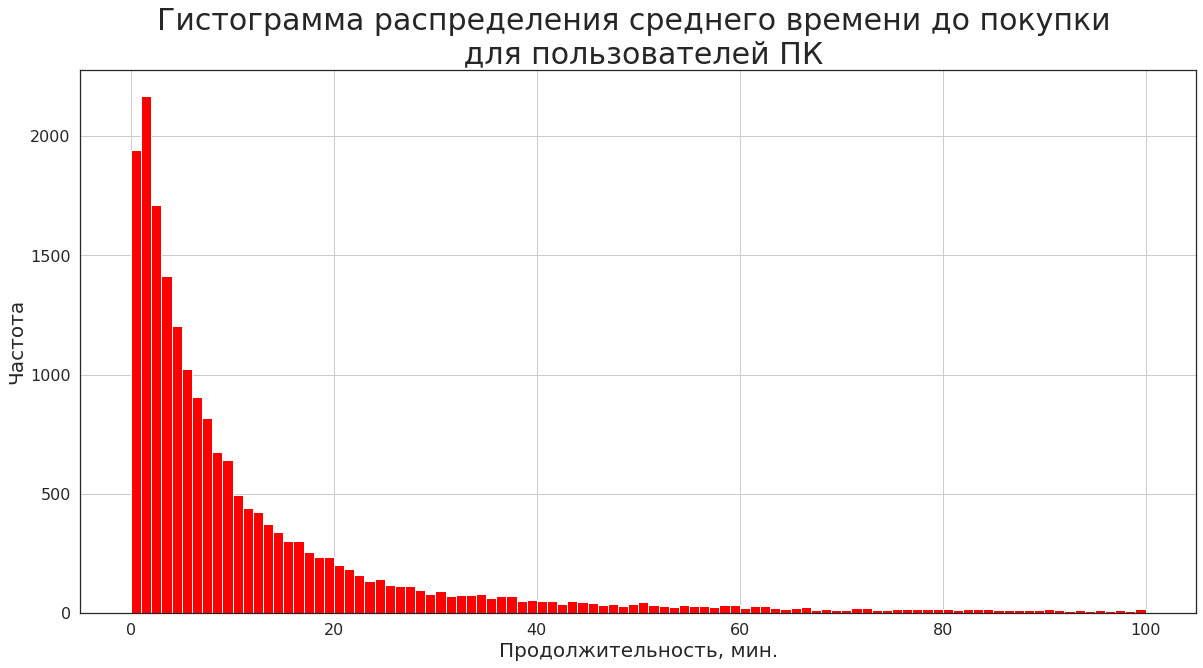

In [78]:
# Построим гистограмму распределения 
# размер рисунка
plt.figure(figsize=(20,10))

# построим гистограмму (кол-во корзин = 100) и плотность распределения
#sns.distplot(first_visits_orders['time_to_buy'], bins=10)
sales_desktop['time_to_buy'].plot(kind='hist', bins=100, color='red', range=(0, 100), grid=True)
# оформление
graphic('Гистограмма распределения среднего времени до покупки \n для пользователей ПК', 'Продолжительность, мин.', 'Частота')

plt.close()

In [79]:
print(' Медианное время покупки:', sales_desktop['time_to_buy'].median(), 'мин.', '\n' ,
       'Наиболее частое время покупки:', sales_desktop['time_to_buy'].mode()[0], 'мин.')

 Медианное время покупки: 15.0 мин. 
 Наиболее частое время покупки: 1.0 мин.


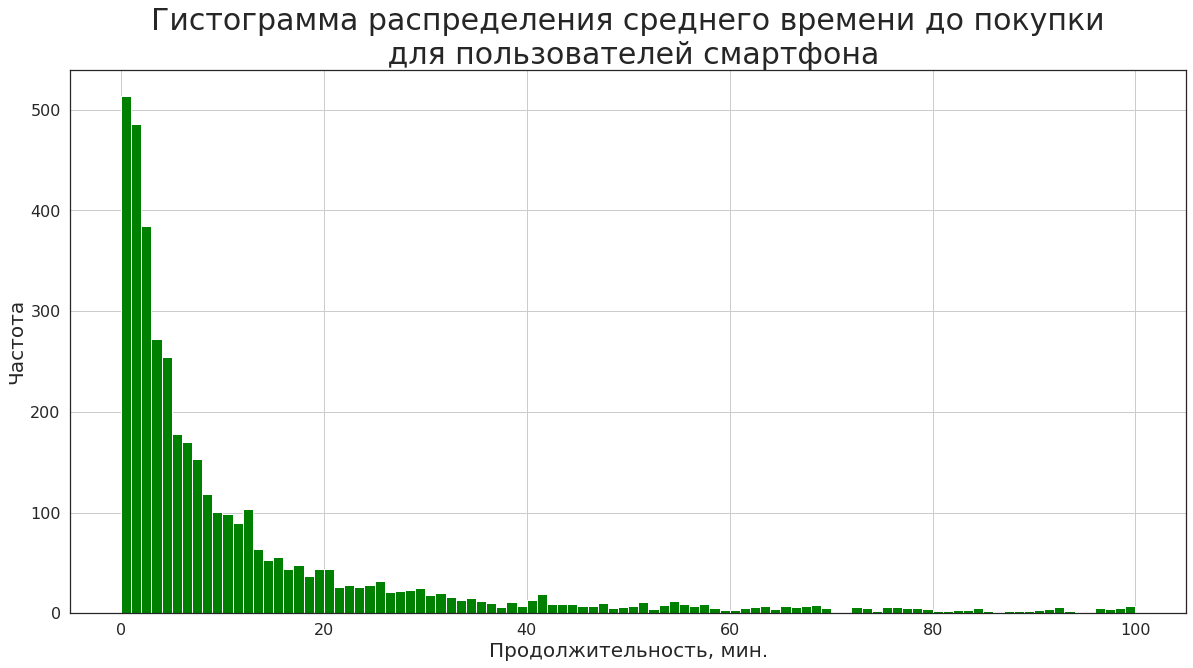

In [80]:
# Построим гистограмму распределения 
# размер рисунка
plt.figure(figsize=(20,10))

# построим гистограмму (кол-во корзин = 100) и плотность распределения
#sns.distplot(first_visits_orders['time_to_buy'], bins=10)
sales_touch['time_to_buy'].plot(kind='hist', bins=100, color='green', range=(0, 100), grid=True)
# оформление
graphic('Гистограмма распределения среднего времени до покупки\n для пользователей смартфона', 'Продолжительность, мин.', 'Частота')

plt.close()

In [81]:
print(' Медианное время покупки:', sales_touch['time_to_buy'].median(), 'мин.', '\n', 
       'Наиболее частое время покупки:', sales_touch['time_to_buy'].mode()[0], 'мин.')

 Медианное время покупки: 38.0 мин. 
 Наиболее частое время покупки: 0.0 мин.


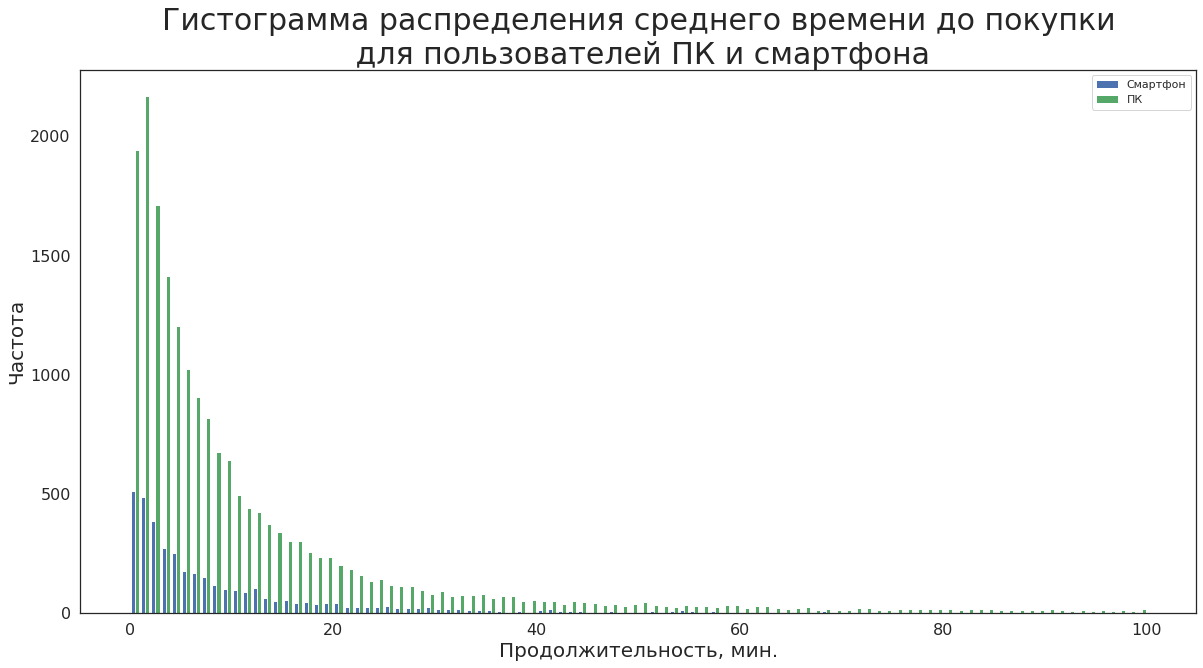

In [82]:
# Построим гистограмму распределения 
# размер рисунка

plt.figure(figsize=(20,10))
plt.style.use('seaborn-deep')
# построим гистограмму (кол-во корзин = 100) и плотность распределения
plt.hist([sales_touch['time_to_buy'], sales_desktop['time_to_buy']], bins=100, label=['Смартфон', 'ПК'],range=(0, 100))
# оформление
plt.legend(loc='upper right')
graphic('Гистограмма распределения среднего времени до покупки\n для пользователей ПК и смартфона', 'Продолжительность, мин.', 'Частота')

plt.close()

Распределения имеют схожий вид, однако в среднем покупка с смартфона занимает большее время, показатели для пользователей  показатели практически совпадают с общей выборкой, так как их большинство 

## Вывод
1. Наиболее частое время покупки - 1 мин.
2. Среднее время покупки - 16 мин.
3. В среднем покупка с смартфона занимает большее время - 38 мин.
4. Для пользователей смартфонов более характерны нулевые сессии


### Cреднее количество покупок на одного клиента за  период 6 месяцев<a name="paragraph2.2.2"></a> 

Применяя когортный анализ, рассчитайте среднее количество покупок на одного клиента за определённый период, например за 6 месяцев;

In [83]:
# Выделим месяц первой покупки, для того чтобы далее выделить когорты
orders['first_buy_month'] = orders['first_buy_date'].astype('datetime64[M]')

In [84]:
# Посчитаем "время жизни"
orders['cohort_lifetime'] = orders['buy_ts'] - orders['first_buy_month']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int') 

In [85]:
# Посчитаем кол-во покупок для каждой кагорты в каждый месяц
cohorts_amount_orders = orders.pivot_table(index='first_buy_month', columns='cohort_lifetime', values='uid', aggfunc='count')

# сложим накопительным итогом кол-во покупок в каждой когорте
cohorts_amount_orders = cohorts_amount_orders.cumsum(axis=1)

cohorts_amount_orders

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
first_buy_month,,,,,,,,,,,,,
2017-06-01,1500.0,2464.0,2603.0,2809.0,3091.0,3299.0,3590.0,3788.0,3978.0,4184.0,4301.0,4381.0,4438.0
2017-07-01,1075.0,2240.0,2336.0,2463.0,2535.0,2619.0,2689.0,2754.0,2802.0,2843.0,2873.0,2910.0,NaN
2017-08-01,574.0,1590.0,1688.0,1789.0,1865.0,1930.0,1993.0,2056.0,2109.0,2171.0,2188.0,NaN,NaN
2017-09-01,1197.0,3068.0,3213.0,3407.0,3499.0,3608.0,3714.0,3790.0,3842.0,3878.0,NaN,NaN,NaN
2017-10-01,2672.0,5122.0,5363.0,5504.0,5629.0,5752.0,5836.0,5911.0,6005.0,NaN,NaN,NaN,NaN
2017-11-01,1763.0,5089.0,5285.0,5492.0,5673.0,5768.0,5836.0,5900.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,2447.0,5192.0,5426.0,5625.0,5743.0,5834.0,5894.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1669.0,3923.0,4088.0,4197.0,4267.0,4308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,2302.0,4238.0,4363.0,4431.0,4470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Выделим кол-во покупок для когорт за 6 месяцев
cohorts_amount_orders[5]

first_buy_month
2017-06-01    3299.0
2017-07-01    2619.0
2017-08-01    1930.0
2017-09-01    3608.0
2017-10-01    5752.0
2017-11-01    5768.0
2017-12-01    5834.0
2018-01-01    4308.0
2018-02-01       NaN
2018-03-01       NaN
2018-04-01       NaN
2018-05-01       NaN
2018-06-01       NaN
Name: 5, dtype: float64

In [87]:
# Посчитаем кол-во пользователей, сделавших покупки, для каждой кагорты в каждый месяц
cohorts_amount_users_orders = orders.pivot_table(index='first_buy_month', columns='cohort_lifetime', values='uid', aggfunc='nunique')

# сложим накопительным итогом кол-во пользователей в каждой когорте
cohorts_amount_users_orders = cohorts_amount_users_orders.cumsum(axis=1)

cohorts_amount_users_orders

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
first_buy_month,,,,,,,,,,,,,
2017-06-01,1293.0,2064.0,2111.0,2161.0,2243.0,2308.0,2373.0,2418.0,2470.0,2523.0,2559.0,2601.0,2644.0
2017-07-01,977.0,1958.0,2009.0,2075.0,2123.0,2168.0,2206.0,2251.0,2290.0,2317.0,2338.0,2355.0,NaN
2017-08-01,532.0,1394.0,1443.0,1494.0,1535.0,1570.0,1606.0,1643.0,1672.0,1701.0,1717.0,NaN,NaN
2017-09-01,1082.0,2645.0,2739.0,2832.0,2879.0,2947.0,3018.0,3064.0,3101.0,3131.0,NaN,NaN,NaN
2017-10-01,2389.0,4465.0,4619.0,4734.0,4827.0,4910.0,4972.0,5019.0,5066.0,NaN,NaN,NaN,NaN
2017-11-01,1590.0,4186.0,4312.0,4429.0,4527.0,4590.0,4641.0,4677.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,2162.0,4476.0,4604.0,4700.0,4767.0,4814.0,4855.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1518.0,3443.0,3527.0,3584.0,3628.0,3654.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,2075.0,3743.0,3812.0,3861.0,3883.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Возьмем только 5 месяц жизни, т.е. когорты прожившие полгода и более,
#и посчитаем среднее кол-во покупок на одного пользователя
cohorts_orders_mean = cohorts_amount_orders[5]/cohorts_amount_users_orders[5]
cohorts_orders_mean

first_buy_month
2017-06-01    1.429376
2017-07-01    1.208026
2017-08-01    1.229299
2017-09-01    1.224296
2017-10-01    1.171487
2017-11-01    1.256645
2017-12-01    1.211882
2018-01-01    1.178982
2018-02-01         NaN
2018-03-01         NaN
2018-04-01         NaN
2018-05-01         NaN
2018-06-01         NaN
Name: 5, dtype: float64

В среднем наибольшее кол-во покупок совершили пользователи первой (06-2017) и пятой (10-2017) когорт

In [89]:
print('Cреднее количество покупок на одного клиента за период 6 месяцев:', cohorts_orders_mean.mean().round())

Cреднее количество покупок на одного клиента за период 6 месяцев: 1.0


## Вывод
1. В среднем на одного клиента за период 6 месяцев приходится одна покупка
2. В среднем наибольшее кол-во покупок совершили пользователи первой (06-2017) и пятой (10-2017) когорт

### Средняя выручка с пользователя<a name="paragraph2.2.3"></a> 

 Рассчитайте среднюю выручку с пользователя. Покажите, как меняется эта метрика с течением времени;

In [90]:
#Посчитаем среднюю выручку с пол-я за весь период
orders['revenue'].sum() / orders.uid.nunique()

6.9013279303452615

Покажем, как меяется средний чек с течением времени

In [91]:
# Добавим столбец с месяцем покупки 
orders['month'] = orders['buy_ts'].astype('datetime64[M]')


In [92]:
# Посчитаем ежемесячную выручку
total_month = orders.pivot_table(index='month', values='revenue', aggfunc='sum').reset_index()
total_month 

,month,revenue
0,2017-06-01,9557.49
1,2017-07-01,12539.47
2,2017-08-01,8758.78
3,2017-09-01,18345.51
4,2017-10-01,27987.70
5,2017-11-01,27069.93
6,2017-12-01,36388.60
7,2018-01-01,19417.13
8,2018-02-01,25560.54
9,2018-03-01,28834.59


In [93]:
# Посчитаем кол-во покупателей в каждый месяц
total_user = orders.groupby('month').agg({'uid':'count'}).reset_index()
# Посчитаем средний чек
total_user['check_per_user'] = total_month.revenue / total_user.uid

total_user

,month,uid,check_per_user
0,2017-06-01,2354,4.060106
1,2017-07-01,2363,5.306589
2,2017-08-01,1807,4.847139
3,2017-09-01,3387,5.416448
4,2017-10-01,5679,4.928280
5,2017-11-01,5659,4.783518
6,2017-12-01,6218,5.852139
7,2018-01-01,4721,4.112927
8,2018-02-01,5281,4.840095
9,2018-03-01,5326,5.413930


In [94]:
total_user['check_per_user'].mean()

4.838699619166338

In [95]:
visits

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,duration,activity_month,first_activity_month,cohort_lifetime,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,18.000000,2017-12-01,2017-12-01,0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,28.000000,2018-02-01,2018-02-01,0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.000000,2017-07-01,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,24.000000,2018-05-01,2018-03-01,2,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0.000000,2017-12-01,2017-12-01,0,2017-12-27 14:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,30,2017-07-29,0.316667,2017-07-01,2017-07-01,0,2017-07-29 19:07:00
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,4,2018-01-25,0.316667,2018-01-01,2018-01-01,0,2018-01-25 17:38:00
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,9,2018-03-03,0.316667,2018-03-01,2018-03-01,0,2018-03-03 10:12:00
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,44,2017-11-02,0.316667,2017-11-01,2017-11-01,0,2017-11-02 10:12:00


In [96]:
tmp = orders.groupby('month').agg({'uid':['count', 'nunique'], 'revenue': 'sum'}).reset_index()
tmp.columns = ['month', 'uid_cnt', 'uid_nuniq', 'revenue_sum']
t1 = tmp\
    .assign(avg_check = lambda row: row['revenue_sum'] / row['uid_cnt'])\
    .assign(avg_revenue = lambda row: row['revenue_sum'] / row['uid_nuniq'])

display(t1)

,month,uid_cnt,uid_nuniq,revenue_sum,avg_check,avg_revenue
0,2017-06-01,2354,2023,9557.49,4.060106,4.724414
1,2017-07-01,2363,1984,12539.47,5.306589,6.320297
2,2017-08-01,1807,1472,8758.78,4.847139,5.950258
3,2017-09-01,3387,2750,18345.51,5.416448,6.671095
4,2017-10-01,5679,4675,27987.70,4.928280,5.986674
5,2017-11-01,5659,4547,27069.93,4.783518,5.953360
6,2017-12-01,6218,4942,36388.60,5.852139,7.363132
7,2018-01-01,4721,3898,19417.13,4.112927,4.981306
8,2018-02-01,5281,4258,25560.54,4.840095,6.002945
9,2018-03-01,5326,4181,28834.59,5.413930,6.896577


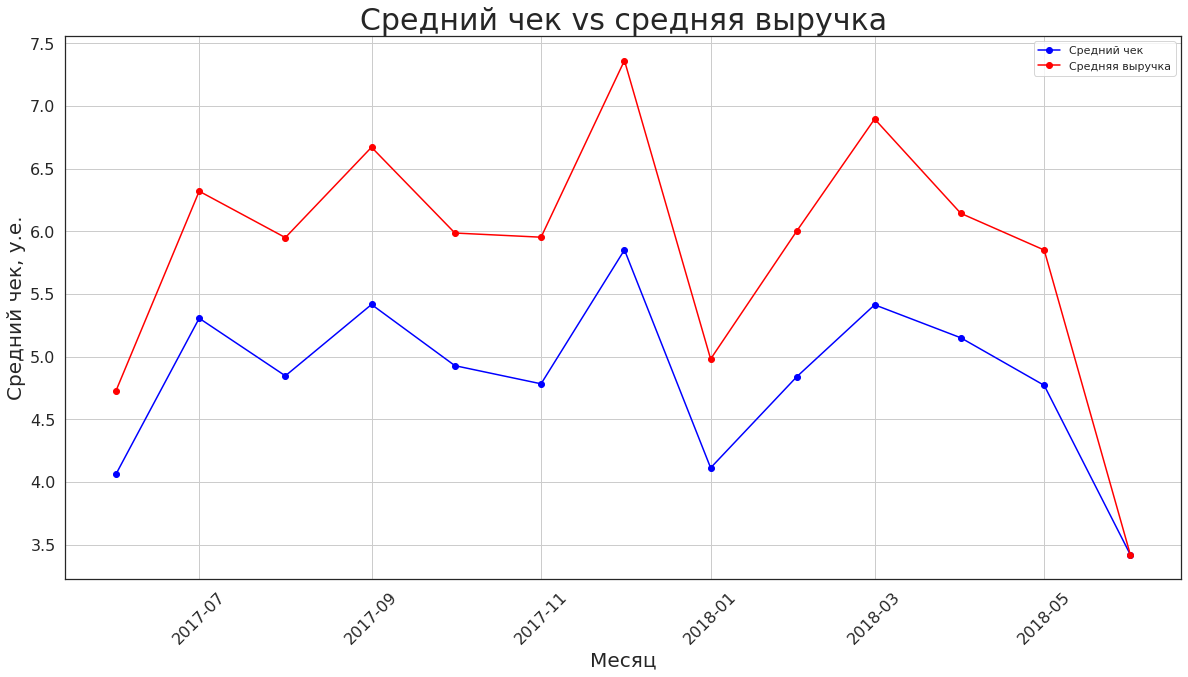

In [97]:
# построим график
plt.figure(figsize =(20,10))
plt.plot( t1['month'],t1['avg_check'], color='blue', label='Средний чек', marker='o', linewidth=1.5)
plt.plot( t1['month'],t1['avg_revenue'], color='red', label='Средняя выручка', marker='o', linewidth=1.5)
plt.legend()
plt.grid()
# Оформление
plt.xticks(rotation=45)
graphic('Средний чек vs средняя выручка','Месяц','Средний чек, у.е.')
plt.close()

<hr style="border: 2px solid orange;" />

In [98]:
total_user.check_per_user.describe()

count    13.000000
mean      4.838700
std       0.656336
min       3.420000
25%       4.771279
50%       4.847139
75%       5.306589
max       5.852139
Name: check_per_user, dtype: float64

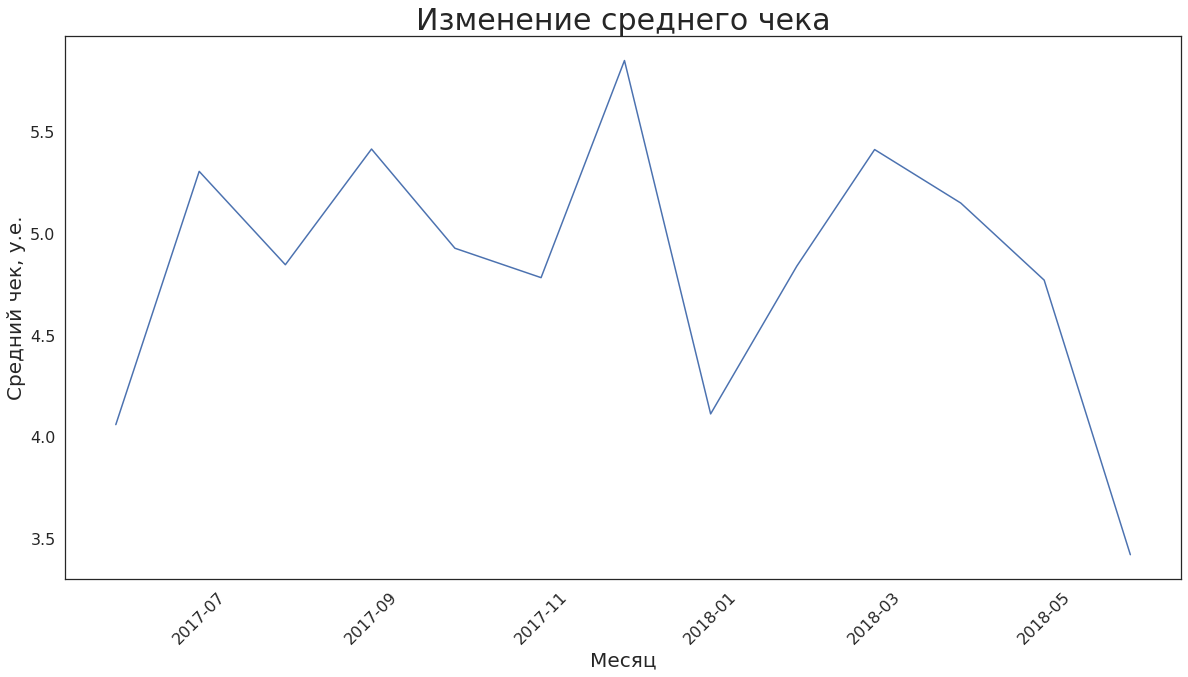

In [99]:
# построим график
plt.figure(figsize =(20,10))
plt.plot( total_user['month'],total_user['check_per_user'])
 
# Оформление
plt.xticks(rotation=45)
graphic('Изменение среднего чека','Месяц','Средний чек, у.е.')

plt.close()

Из графика можно сделать, что сред. чек примерно одинаков во все периоды, и значения "колеблются" около своего среднего значения - 5 у.е. Падение графика после 05-2018 - объясняется, просто мало данных за послед. период


Посмотрим на распределение 

In [100]:
print('Средняя выручка за весь период для ПК:', 
      (sales_desktop['revenue'].sum() /
       sales_desktop.reset_index().uid.nunique()).
                                          round(),
      'у.е.')

print('Средняя выручка за весь период для смартфонов:', 
      (sales_touch['revenue'].sum() /
       sales_touch.reset_index().uid.nunique()).
                                          round(),
      'у.е.')

Средняя выручка за весь период для ПК: 7.0 у.е.
Средняя выручка за весь период для смартфонов: 6.0 у.е.


## Вывод
1. Средняя выручка для всей выборки 6.9 у.е.
2. Средний чек для периода ~ 4.8 у.е и одинаков для всего периода, с погрешностью на стат. отклонения 
3. Средняя выручка с пользователей ПК выше чем с смартфонов

### LTV<a name="paragraph2.2.4"></a> 

 Выясните, как меняется во времени накопительный LTV по когортам. Сравните средний LTV по когортам за 6 месяцев. Оценивайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%.

In [101]:
# Сгруппируем orders по месяцу первой покупки и месяцу каждого заказа и сложим выручку
cohorts = orders.groupby(['first_buy_month','month']).agg({'revenue': 'sum'}).reset_index()
cohorts

,first_buy_month,month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [102]:
# посчитаем кол-во новых покупателей за каждый месяц
cohort_sizes = orders.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_buy_month', 'n_buyers']

In [103]:
# Объеденим эти две таблицы
report = pd.merge(cohort_sizes, cohorts, on='first_buy_month')
report

,first_buy_month,n_buyers,month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [104]:
# маржинальность 100 %
margin_rate = 1
# Посчитаем гросс прибль    
report['gp'] = report['revenue'] * margin_rate
# Посчитаем возраст когорт
report['age'] = (report['month'] - report['first_buy_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report

,first_buy_month,n_buyers,month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1
77,2018-05-01,2988,2018-05-01,13925.76,13925.76,0


In [105]:
# Посчитаем LTV
report['ltv'] = report['gp'] / report['n_buyers']
# Визуализируем через свод. таблицу   
output = report.pivot_table(
        index='first_buy_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')
    
ltv_output = output.cumsum(axis=1)
ltv_output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,


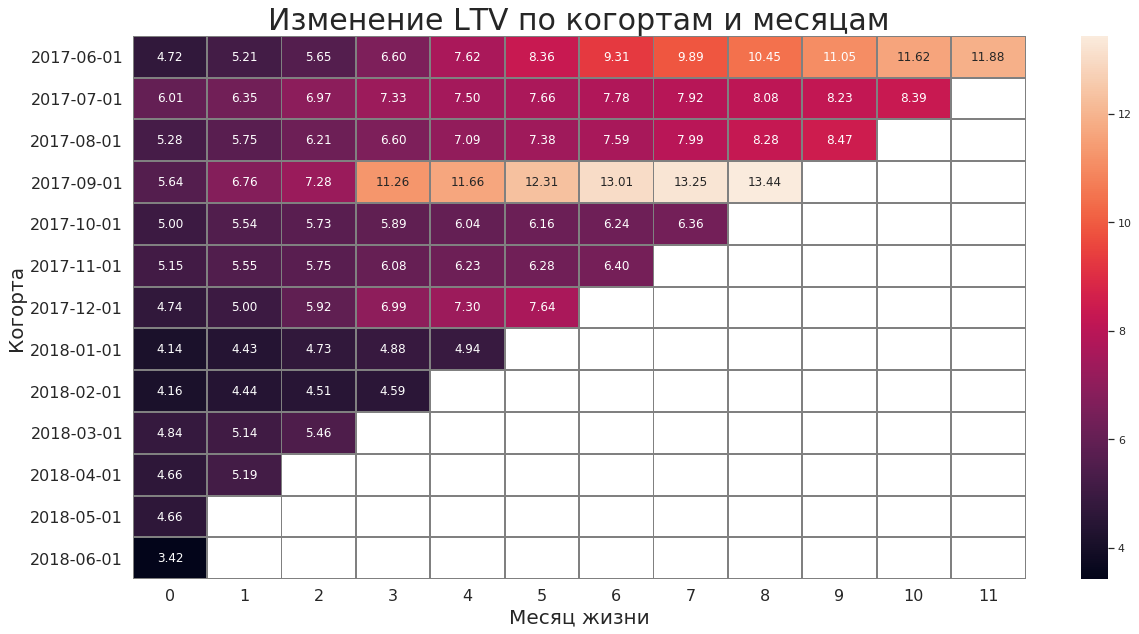

In [106]:
# Отбросим время в дате
ltv_output.index = ltv_output.index.strftime('%Y-%m-%d')
# Визуализируем рез-т с помощью тепловой карты
sns.set(style='white')
plt.figure(figsize=(20, 10))
# Округлим до двух знаков после запятой
sns.heatmap(ltv_output, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
# Оформление
graphic('Изменение LTV по когортам и месяцам', 'Месяц жизни', 'Когорта')

plt.close()

В среднем темп роста LTV со временем снижается во всех когортах. Можно отметить, относительно высокий рост показателя для когорты (09-17) на четвертом году жизни (на графике месяц жизни = 3). Это всплеск приходится на декабрь 2017 года

In [107]:
# Сравним показатель для когорт проживших 6 месяцев
ltv_output[5]

2017-06-01     8.360084
2017-07-01     7.660775
2017-08-01     7.375861
2017-09-01    12.306463
2017-10-01     6.159956
2017-11-01     6.280316
2017-12-01     7.639913
2018-01-01          NaN
2018-02-01          NaN
2018-03-01          NaN
2018-04-01          NaN
2018-05-01          NaN
2018-06-01          NaN
Name: 5, dtype: float64

Среди когорт можно выделить: когорту 2017-06-01 и  2017-09-01

## Вывод
1. Среди когорт по метрике LTV можно выделить: когорту 2017-06-01 и 2017-09-01
2. Можно отметить относительно высокий рост LTV для когорты (09-17) в декабре 2017 года
3. Метрика с течением времени падает для всех когорт, т.е. с течением времени каждая когорта приносит все меньше денег компании 

## Маркетинговые метрики<a name="paragraph2.3"></a> 
Рассчитайте и отобразите на графиках, как маркетинговые метрики отличаются по рекламным источникам

###  Распределение расходов по рекламным источникам<a name="paragraph2.3.1"></a> 

Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам и как меняется это распределение во времени;

In [108]:
total_costs = costs.costs.sum()
print('Общая сумма расходов на маркетинг:',total_costs)

Общая сумма расходов на маркетинг: 329131.62


In [109]:
# выделим месяц в дате затрат
costs['month'] = costs['dt'].astype('datetime64[M]')

In [110]:
# посчитаем суммарные расходы по источникам за каждый месяц
source = costs.pivot_table(index='month', columns='source_id', values='costs',aggfunc='sum')
source

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


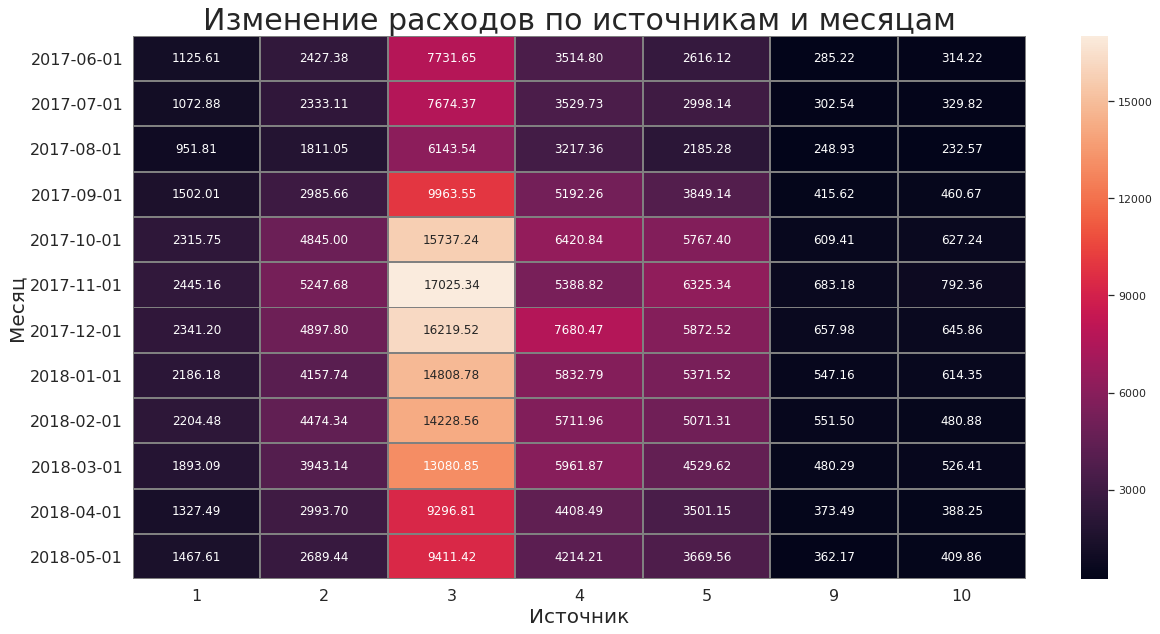

In [111]:
# Отбросим время в дате
source.index = source.index.strftime('%Y-%m-%d')
# Визуализируем рез-т с помощью тепловой карты
sns.set(style='white')
plt.figure(figsize=(20, 10))
# Округлим до двух знаков после запятой
sns.heatmap(source, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
# Оформление
graphic('Изменение расходов по источникам и месяцам', 'Источник', 'Месяц')

plt.close()

Наиболее финансируемый источник - 3. Можно отметить рост расходов на все каналы в период с 07-2017 г. по ~ 03-2018 (особенно финансировались источники: 2,3,4,5). В последние месяцы расходы на маркетинг снижаются

## Вывод
1. Общая сумма расходов на маркетинг: 329131.62 у.е.
2. Наиболее финансируемый источник - 3
3. Расходы на маркетинг возрасли в период с июня 2017 по март 2018 г. 
4. В последние месяцы маркет. бюджет уменьшился

### CAC<a name="paragraph2.3.2"></a> 

 Рассчитайте CAC. Определите, сколько стоит привлечение одного покупателя из каждого источника трафика;

In [112]:
# Возьмем только данные с датой первой сессии на сайте
visits_only = visits.loc[visits['start_ts'] == visits['first_activity_date']]

In [113]:
# Проверим, в visits_only должны остаться только записи уникальных пользователей
visits_only.uid.count() - visits.uid.nunique()

1

В visits есть какой-то дубликат uid

In [114]:
# определим дубликат
visits_only.loc[visits_only.duplicated(subset='uid', keep= 'first')]

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,duration,activity_month,first_activity_month,cohort_lifetime,first_activity_date
47067,touch,2018-03-16 08:55:00,1,2018-03-16 08:55:00,1981020429381477763,2018,3,11,2018-03-16,0.0,2018-03-01,2018-03-01,0,2018-03-16 08:55:00


In [115]:
# Найдем запись с этим uid
visits_only.query('uid == "1981020429381477763"')

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,duration,activity_month,first_activity_month,cohort_lifetime,first_activity_date
44993,touch,2018-03-16 08:57:00,1,2018-03-16 08:55:00,1981020429381477763,2018,3,11,2018-03-16,2.0,2018-03-01,2018-03-01,0,2018-03-16 08:55:00
47067,touch,2018-03-16 08:55:00,1,2018-03-16 08:55:00,1981020429381477763,2018,3,11,2018-03-16,0.0,2018-03-01,2018-03-01,0,2018-03-16 08:55:00


Вход был произведен  с одного устройства из одного источника в одно и тоже время. При этом продолжительность одной из сессий ноль. Избавимся от этой записи 

In [116]:
visits = visits.query('~(uid =="1981020429381477763" and duration==0)')
# Проверим еще раз
visits_only = visits.loc[visits['start_ts'] == visits['first_activity_date']]
visits_only.uid.count() - visits.uid.nunique()

0

Теперь у нас только данные по одному уник. пользователю

In [117]:
# оставим только те uid, кто совершил заказ
visits_only = visits_only.query('uid in @orders.uid.unique()')

In [118]:
# Посчитаем кол-во пользователей пришедших из каждого источника
n_users_source = visits_only.groupby('source_id').agg({'uid': 'count'}).reset_index()
n_users_source

,source_id,uid
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


In [119]:
# Посчитаем сумм. расходы на каждый источник
costs_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
costs_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


На источники 6 и 7 бюджет не тратился

In [120]:
# Объеденим таблицы
n_users_source = n_users_source.merge(costs_source, on='source_id')
n_users_source

,source_id,uid,costs
0,1,2899,20833.27
1,2,3506,42806.04
2,3,10473,141321.63
3,4,10296,61073.60
4,5,6931,51757.10
5,9,1088,5517.49
6,10,1329,5822.49


In [121]:
# Посчитаем CAC
n_users_source['cac'] = n_users_source.costs /n_users_source.uid
n_users_source

,source_id,uid,costs,cac
0,1,2899,20833.27,7.186364
1,2,3506,42806.04,12.209367
2,3,10473,141321.63,13.493901
3,4,10296,61073.60,5.931779
4,5,6931,51757.10,7.467479
5,9,1088,5517.49,5.071222
6,10,1329,5822.49,4.381106


## Вывод

1. Источники 6, 7  бюджет не тратился
2. Источник  3  - в наибольшей степени способствует привлечению покупателей, на него и приходятся наибольший рекламный бюджет, нужно посчитать ROMI, для того чтобы понять стоит увеличивать или уменьшать расходы на этот источник
3. Источник 2 также имеет высокий показатель CAC, возможно стоит увеличить маркетинг. расходы на него
4. Источник 4 имеет относительно низкий CAC, можно подумать о перераспределение расходов от этого источника в пользу 2 и 3
5. Источник 9  - относительно дешевый, а имеет не самый низкий CAC, возможно стоит обратить на это внимание 



### ROMI<a name="paragraph2.3.3"></a> 

Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт.

In [122]:
# Добавим к таблице заказов информацию по источнику
orders_new = orders.merge(visits_only, on='uid')

In [123]:
# Избавимся от данных по 6 и 7 источнику, так как на них не выделялся бюджет
orders_new = orders_new.query('~(source_id == 6 or source_id == 7)')

In [124]:
# Создадим датафрейм, в кот. сохраним ROMI за 6 месяцев
output_i_romi_six = pd.DataFrame()

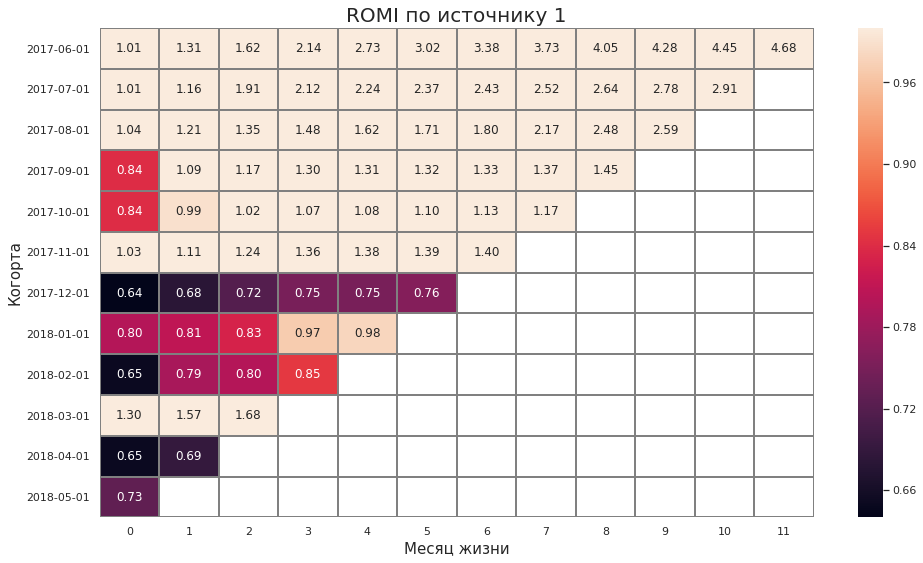

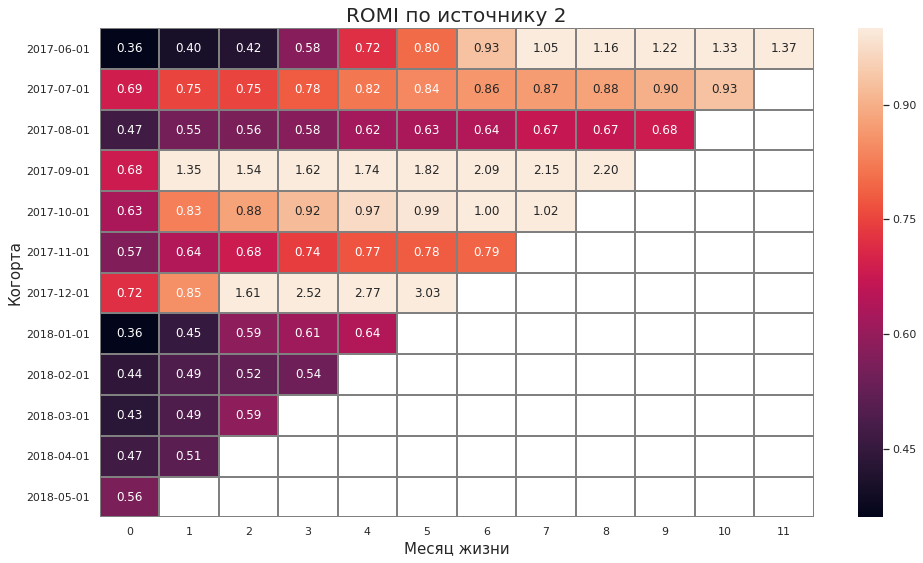

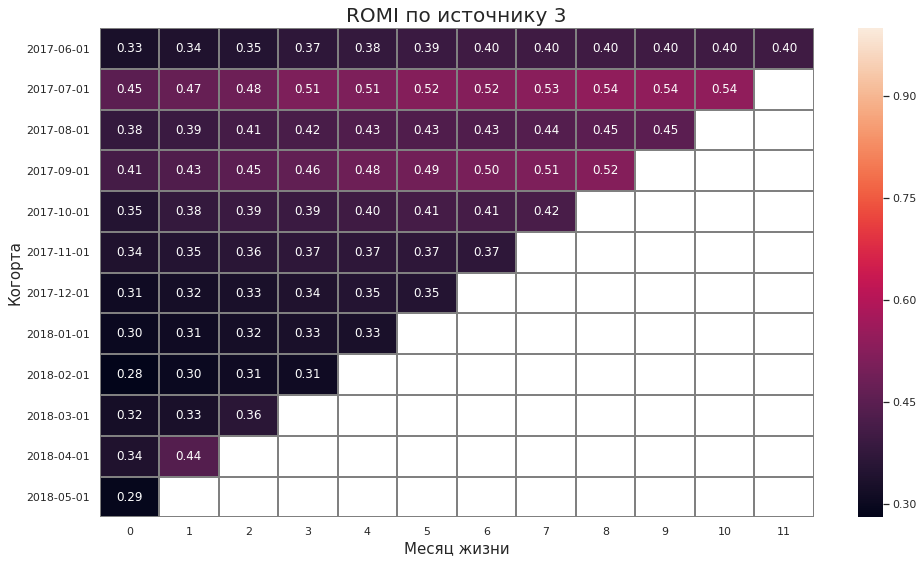

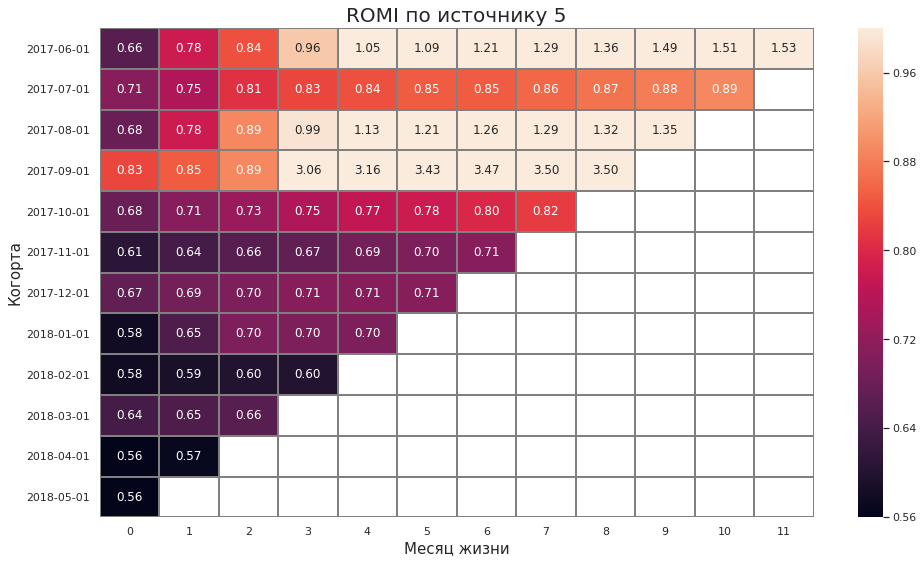

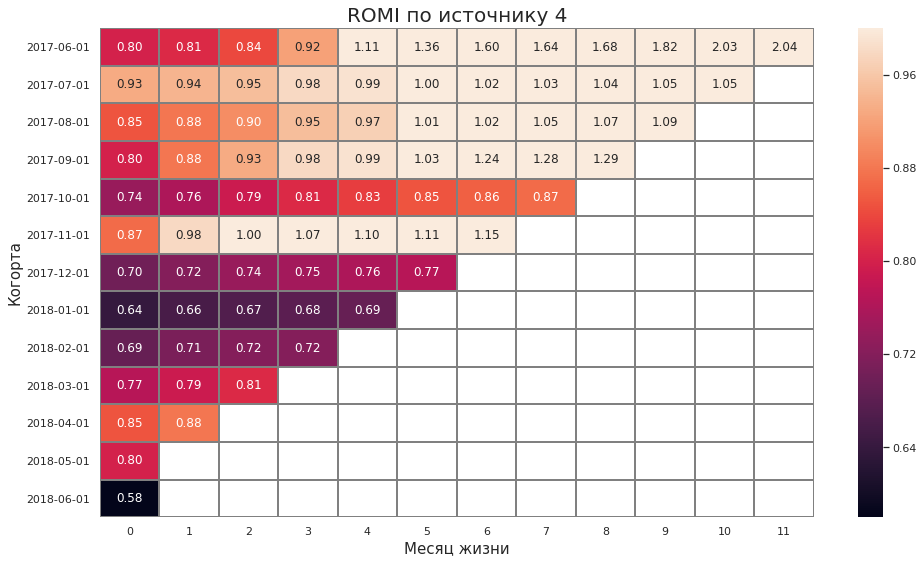

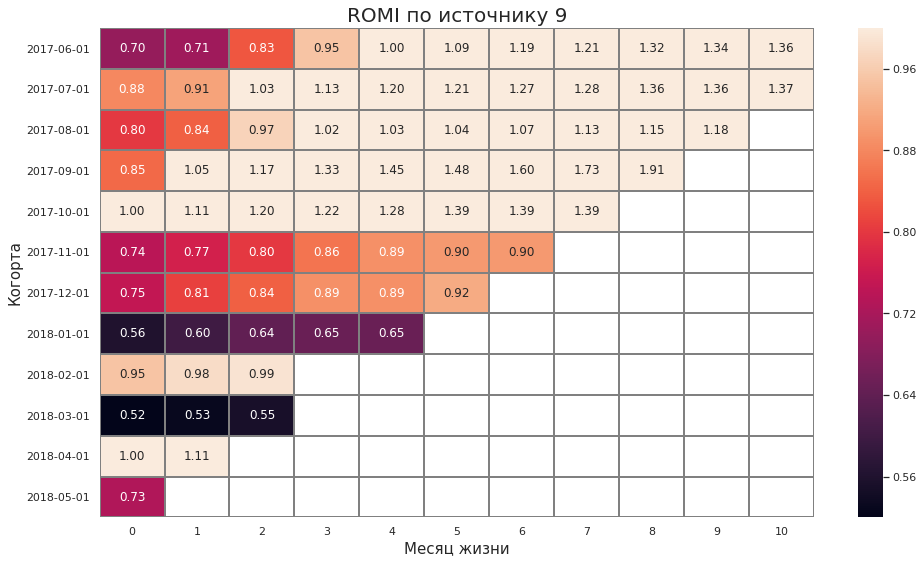

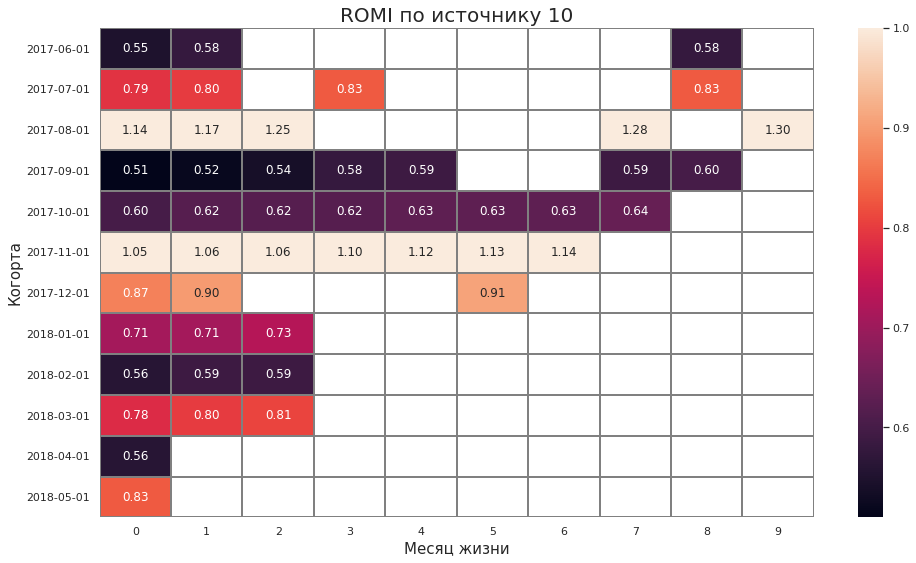

In [125]:
#Построение графиков ROMI
# Цикл будет пробегать по всем источникам
for i in orders_new['source_id'].unique():
    # Делаем срез по источнику
    orders_new_i = orders_new.loc[orders_new['source_id']==i]
    # Посчитаем кол-во новых покупателей за каждый месяц    
    cohort_sizes_i = orders_new_i.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes_i.columns = ['first_buy_month', 'n_buyers']
    
    # Сгруппируем данные по месяцу первой покупки и месяцу каждого заказа и сложим выручку
    cohorts_i = orders_new_i.groupby(['first_buy_month','month']).agg({'revenue': 'sum'}).reset_index()
    # Объеденим таблицы
    report_i = cohorts_i.merge(cohort_sizes_i, on='first_buy_month')
    # маржинальность 100 %
    margin_rate = 1
    # Посчитаем гросс прибль    
    report_i['gp'] = report_i['revenue'] * margin_rate
    # Посчитаем возраст когорт
    report_i['age'] = (report_i['month'] - report_i['first_buy_month']) / np.timedelta64(1, 'M')
    report_i['age'] = report_i['age'].round().astype('int')
    report_i['ltv']=report_i['gp']/report_i['n_buyers']
    # Делаем срез по исчточнику, чтобы получить соотв. САС
    source_cac_i = n_users_source[n_users_source['source_id']==i].reset_index()['cac'][0]
    # Считаем ROMI
    report_i['romi'] = report_i['ltv'] / source_cac_i
    # Делаем свод. таблицу
    output_i_romi = report_i.pivot_table(index='first_buy_month',
                         columns='age',
                         values='romi',
                         aggfunc='mean').round(2)
    # Избавляемся от часов:минут
    output_i_romi.index = output_i_romi.index.strftime('%Y-%m-%d')
    # Считаем кум. сумму
    output_i_romi = output_i_romi.cumsum(axis=1).round(2)
    # Добавляем ROMI за 6 месяцев по когортам
    output_i_romi_six[i] = output_i_romi[5]
   

    # Визулизация тепловой карты
    sns.set(style='white')
    plt.figure(figsize=(16, 9))
    plt.title('ROMI по источнику {}'.format(i), fontsize=20)
    
    sns.heatmap(output_i_romi, annot=True, fmt=".2f", linewidths=1, linecolor='gray', vmax=1)
    plt.xlabel('Месяц жизни', fontsize=15),
    plt.ylabel('Когорта', fontsize=15)
    plt.show()
    plt.close()
    
   

In [126]:
# Оставляем когорты прожившие >= 6 месяцев
output_i_romi_six = output_i_romi_six.query('index<"2018-01-01"')

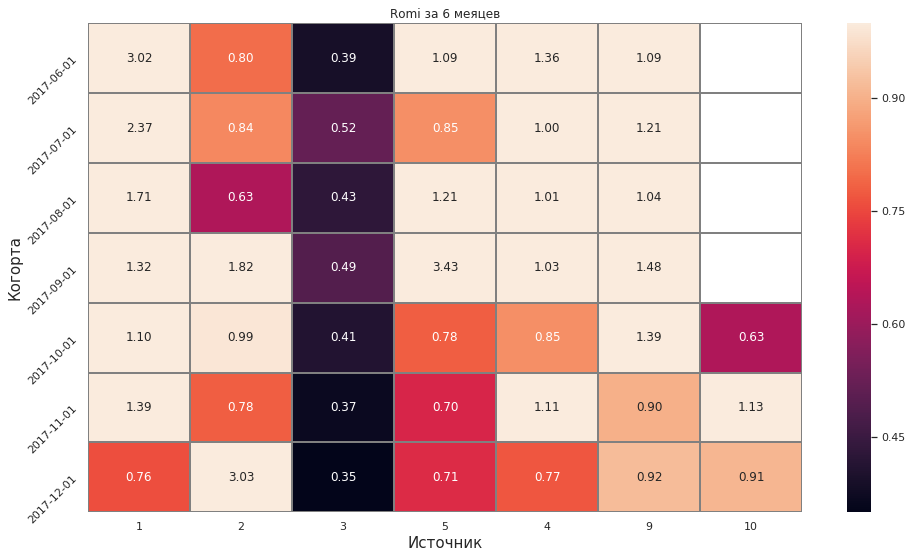

In [127]:
# Строим теплову карту
sns.set(style='white')
plt.figure(figsize=(16, 9))
plt.title('Romi за 6 меяцев')
sns.heatmap(output_i_romi_six, annot=True, fmt=".2f", linewidths=1, linecolor='gray', vmax=1)
plt.xlabel('Источник', fontsize=15),
plt.ylabel('Когорта', fontsize=15)
plt.yticks(rotation=45)
plt.show()
plt.close()

## Вывод
1. Высокие показатели ROMI для источника 1
2. "Низкий" ROMI у источника 3, нужно снижать расходы на этот источник
3. На источник 9 выделяется относительно немного, хотя у ROMI у него "не хуже", чем у источников 4 и 5 - > 1
4. У 10 источника много "пропусков", т.е. в какие-то месяцы у нас вообще нет покупателей из этого источника
5. Для большинства когорт ROMI самый высокий у 1 источника, за исключением когорты 09-2017 - источник 5, и когорты - 12-2017 источник 2. Возможно нужно посмотреть, что как именно была реализована реклама в этих источниках в соотв. периоды, так как она явно имеет положительный результат

## Шаг 3. Сформулируйте выводы и рекомендации<a name="paragraph3"></a>

1. Тип устройства


* Более 70% пользователей посещают сайт через персональные компьютеры, оставшаяся часть использует для этого смартфоны и планшеты
* Рекомендуется обратить внимание на то, что возможны тех. проблемы при «заходе» на сайт через смартфоны


2. Источник


*	Наиболее дорогим источником привлечения покупателей является источник 3. Однако показатель LTV по этому источнику при разделении покупателей на месячные когорты уступает практически всем остальным.  Также показатель ROMI кажется «неубедительным»
* Тогда как достаточно высоки LTV и ROMI – для источника 1
* Исчточники 9 и 10 являются самыми «дешевыми». Источник 9 при этом имеет ROMI сравнимый с 4 и 5 источником.
* Из источник 10 периодически вообще не «приходят» покупатели
* Рекомендация – сократить расходы на источники 3 и 10, и перераспределить буджет на источник 1 и 9


3. Продуктовые метрики  


*	DAU=908, WAU=5716, MAU=23228, в день в среднем происходит 987 сессий
* Есть сигнал, что в последние месяцы активность пользователей снижается, причем это характерно для всех устройств, возможно есть проблемы с контентом сайта
* Средняя продолжительность пользовательской сессии – 5-6 мин., а наиболее часто встречающаяся продолжительность: 1 мин.
* 10 % всех сессий - нулевой продолжительности, возможно есть технические проблемы
* Retention Rate падает для всех когорт. Необходимо продумать эффективные механизмы удержания клиента. На второй месяц у всех месячных когорт он падает до уровня ниже 10%, далее не поднимается выше 7%.


4. Метрики электронной коммерции 


* Наиболее частое время покупки - 1 мин., а среднее время покупки - 16 мин.
* В среднем на одного клиента за период 6 месяцев приходится одна покупка
* Средний чек для периода 6 месяцев ~ 4.8 у.е и одинаков для всего периода, с погрешностью на стат. отклонения
* Метрика LTV с течением времени падает для всех когорт, т.е. с течением времени каждая когорта приносит все меньше денег компании

5. Маркетинговые метрики


* Общая сумма расходов на маркетинг: 329131.62 у.е., а наиболее финансируемый источник - 3
* Расходы на маркетинг возрасли в период с июня 2017 по март 2018 г., в последние месяцы маркет. бюджет уменьшился
* Источники 6, 7 бюджет не тратился, источник 2 имеет высокий показатель CAC, возможно стоит увеличить маркетинг. расходы на него

* Источник 9 - относительно дешевый, а имеет не самый низкий CAC, возможно стоит обратить на это внимание
* Высокие показатели ROMI для источника 1
* "Низкий" ROMI у источника 3, нужно снижать расходы на этот источник

* У 10 источника много "пропусков", т.е. в какие-то месяцы у нас вообще нет покупателей из этого источника
* Для большинства когорт ROMI самый высокий у 1 источника, за исключением когорты 09-2017 - источник 5, и когорты - 12-2017 источник 2. Возможно нужно посмотреть, что как именно была реализована реклама в этих источниках в соотв. периоды, так как она явно имеет положительный результат



6. 	Анализ показателя LTV по месячным когортам показал наиболее высокий у первой и четвертой когорт покупателей



7. Различия метрик в разрезе устройств




* С ПК заходит больше пользователей. Временные же тенденции характерны для обоих устройств - снижение кол-ва пользователей
* Среднее количество сессий в день для пользователей ПК превосходит аналогичный показатель для пользователей смартфонов
* С ПК пользователи «сидят» на сайте дольше – 6 мин., по сравнению с 3 мин. с смартфона

## Рекомендации

*	Больше внимания уделить привлечению пользователей на смартфонах и планшетах, не снижая, при этом, затрат на привлечение пользователей ПК;
*	Разработать эффективные механизмы удержания пользователей, дополнительные стимулы для повторных покупок на сайте;
*	Перераспределить маркетинговый бюджет, снизить расходы на источник 3 и 10, увеличить бюджетирование источников 1, 4, 5 и 9, 
